# Imports and Function Definitions

In [1]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

In [2]:
""" Function Declarations """

# Returns the Michaelis-Menten Velocity for given
# Substrate Concentration, Km, and Vmax
def mich_menten(S, k_m, v_max):
    return v_max * S / (k_m + S)

# Returns a dictionary containing kinetic data for
# all given parameter combinations
def run(params, data={}):
    for s, km, vmax in params:
        if (km, vmax) not in data:
            data[(km,vmax)] = list()
    
        data[(km, vmax)].append(mich_menten(s,km, vmax))
    
    return data

# Returns a list of the generated data for given km, vmax values
def run_with_data(S, k_m, v_max):
    data = list()
    
    for s in S:
        data.append(mich_menten(s, k_m, v_max))
    
    return data

# Returns the plot for the specified Km pairings
# kms is a dictionary containing the km values
# pairs is a list of tuples for which km values we want to plot against each other
def plot_with_data(S, kms, pairs, vmax=370):
    
    for pair in pairs:
        chem1 = pair[0]
        chem2 = pair[1]
        
        data1 = run_with_data(S, kms[chem1], vmax)
        data2 = run_with_data(S, kms[chem2], vmax)
        
        plt.plot(S, data1, label=f'{chem1} Rate: Km={kms[chem1]} Vmax={vmax}')
        plt.plot(S, data2, label=f'{chem2} Rate: Km={kms[chem2]} Vmax={vmax}')

        plt.xlabel('Substrate Concentration (M)')
        plt.ylabel('Reaction Velocity (M/sec)')

        dom = chem1 if dominant(data1, data2) == '1' else chem2
        plt.title(f'{dom} dominates')

        plt.legend()

        plt.show()

# Returns which enzyme dominated from the given
# kinetic data
# Probably, needs a minor rework as it doesn't entirely fit its use currently.
def dominant(dataset1, dataset2):
    result = 'Indeterminant'
    
    if max(dataset1) > max(dataset2):
        result = '1'
    
    if max(dataset1) < max(dataset2):
        result = '2'
    
    return result

# Returns the intersection point of the two datasets
def intersection(dataset1, dataset2, start=100):
    # lambda function to check who is dominating currently
    _dominant = lambda x, y: 1 if x > y else 2
    
    # assume an intersection point after start val
    prev = _dominant(dataset1[start], dataset2[start])
    
    for point in range(start, len(dataset1)):
        if _dominant(dataset1[point], dataset2[point]) != prev:
            return point
        
    return None

# Data Simulation

In [3]:
""" Data Simulation """

# Define parameter space
MAX_S = 5
NUM_S = 1000
S = np.linspace(0, MAX_S, NUM_S)
Km = np.linspace(0.1, 1, 10)
Vmax = np.linspace(0.9, 1.1, 2)

# Get all combinations of 
# the parameter space
params = product(S, Km, Vmax)

# Generate the data
data = run(params)

# Plot

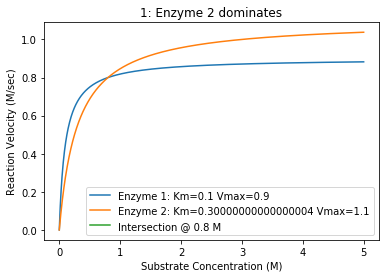

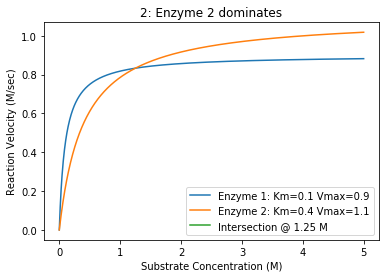

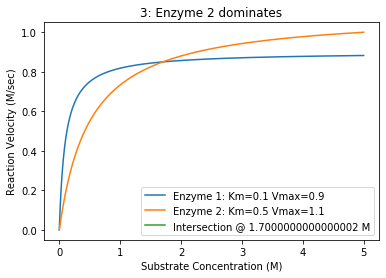

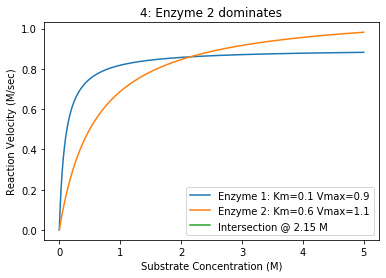

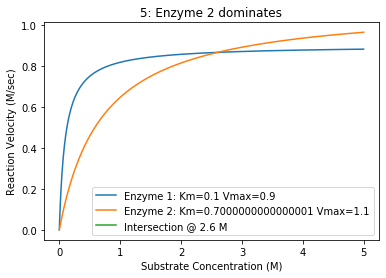

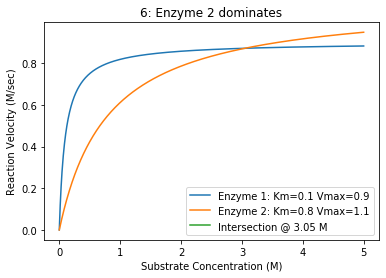

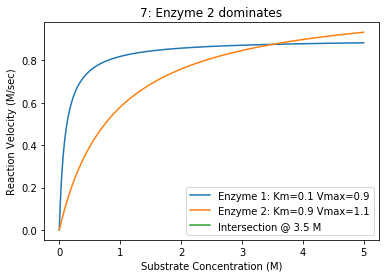

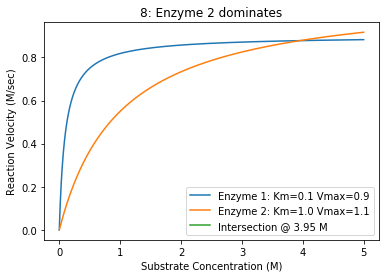

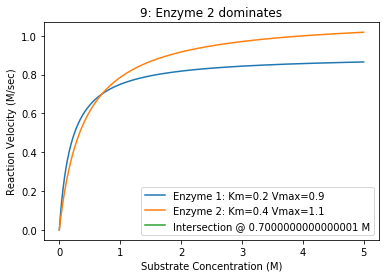

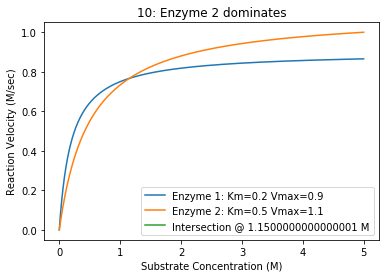

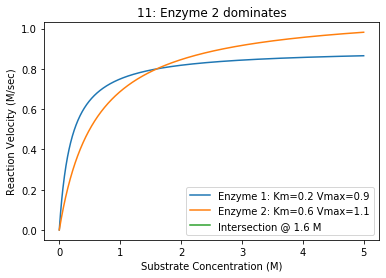

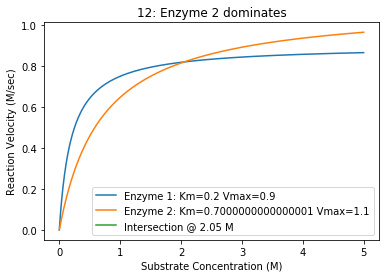

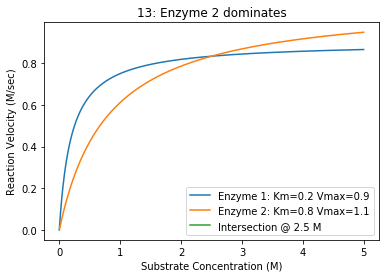

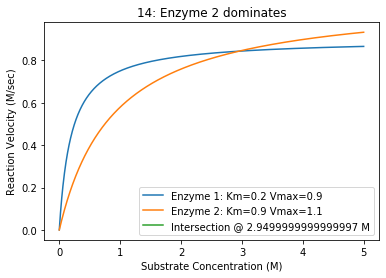

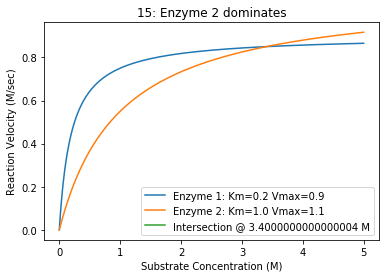

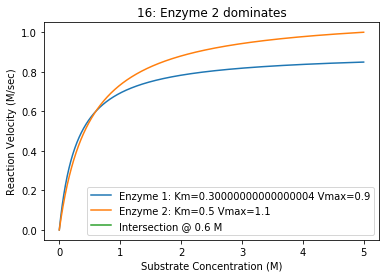

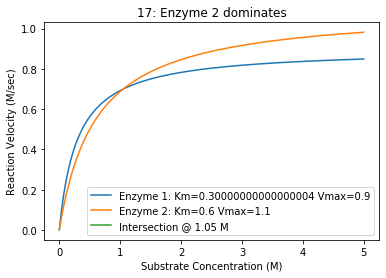

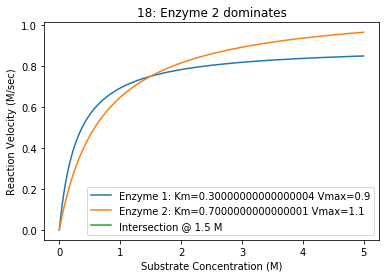

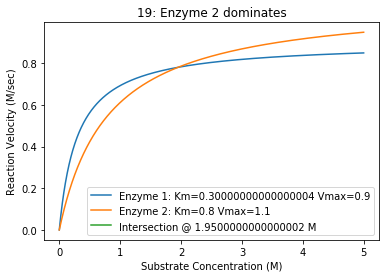

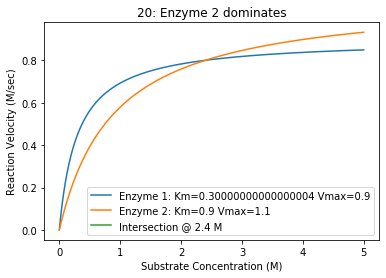

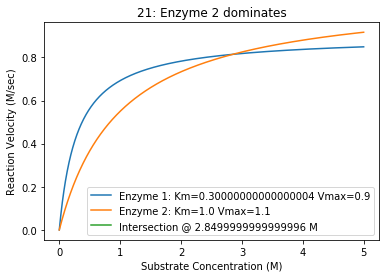

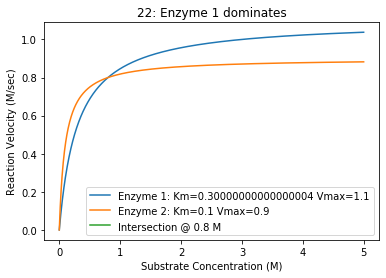

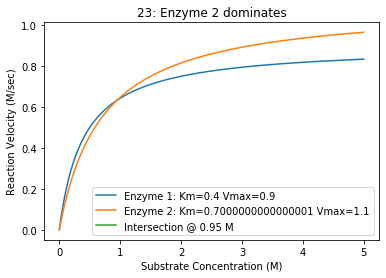

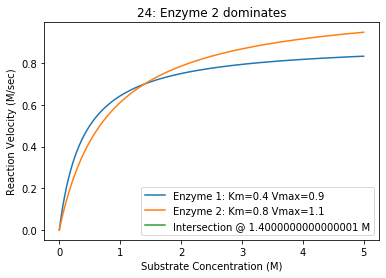

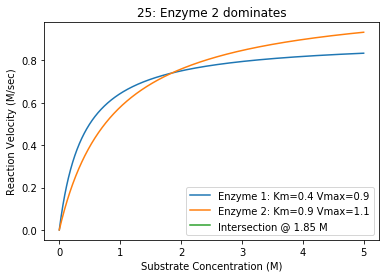

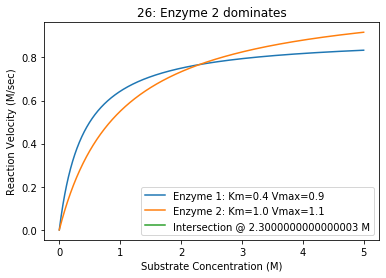

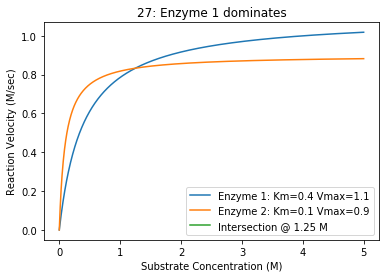

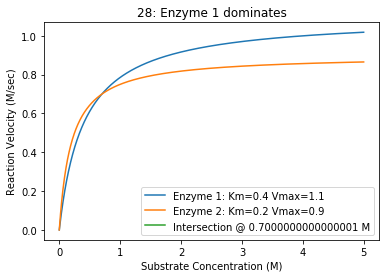

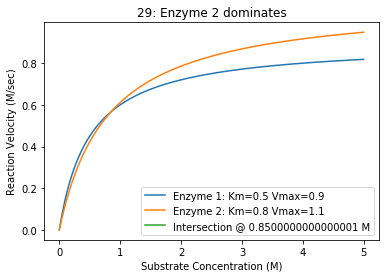

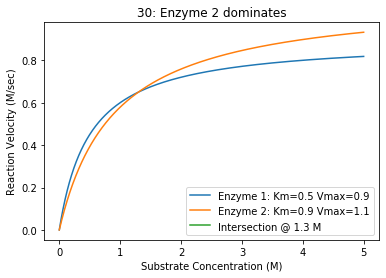

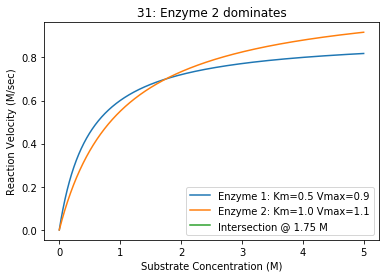

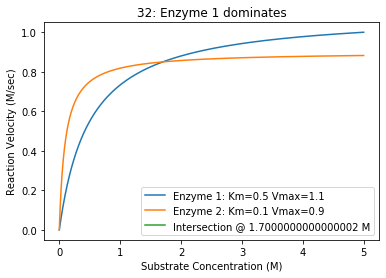

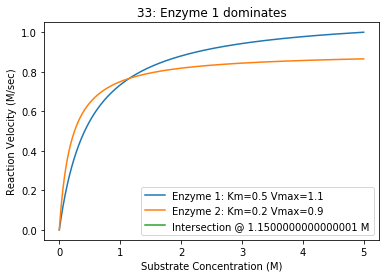

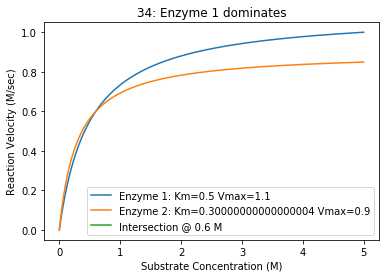

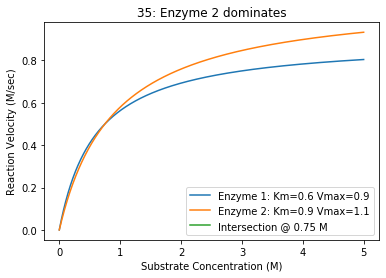

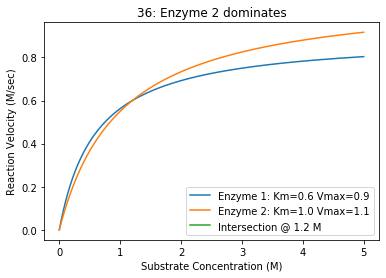

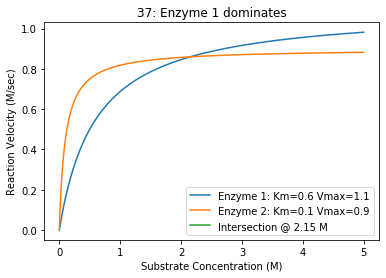

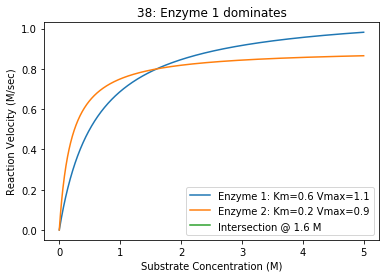

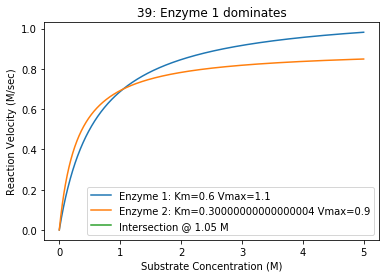

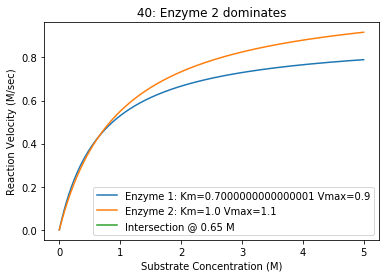

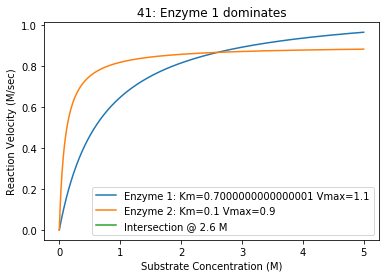

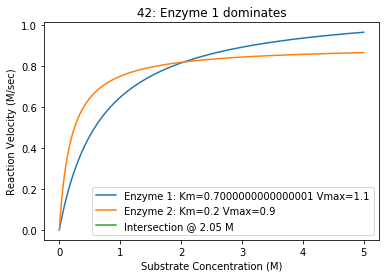

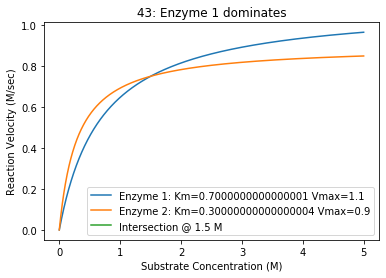

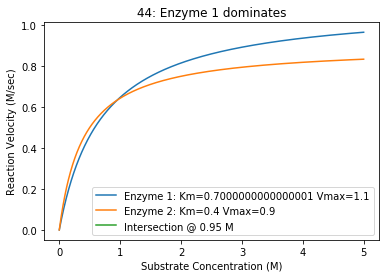

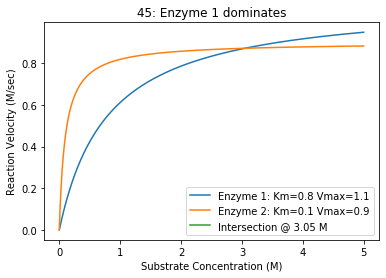

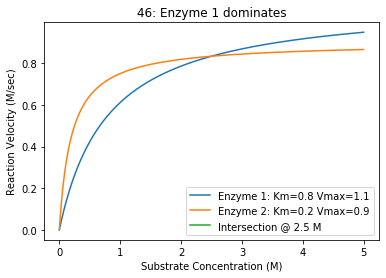

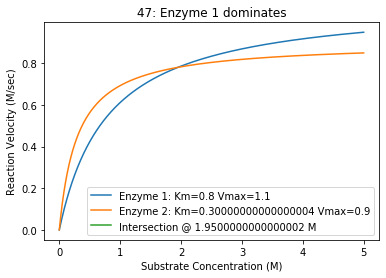

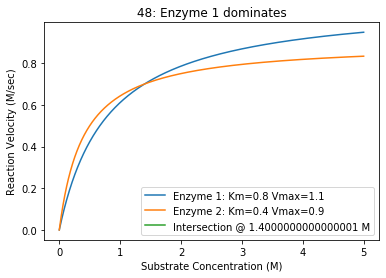

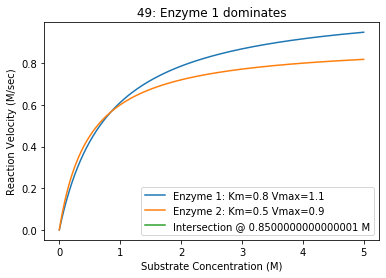

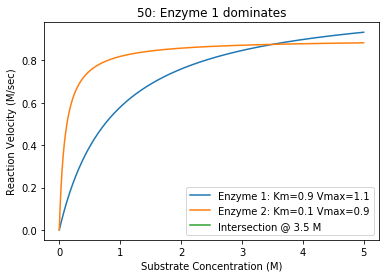

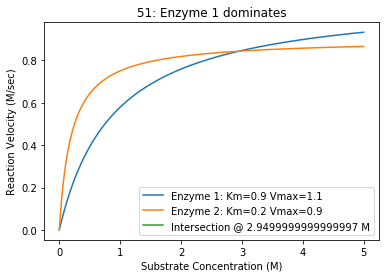

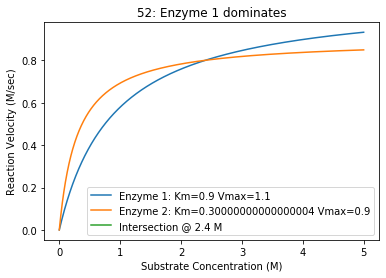

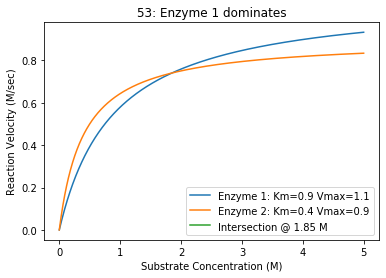

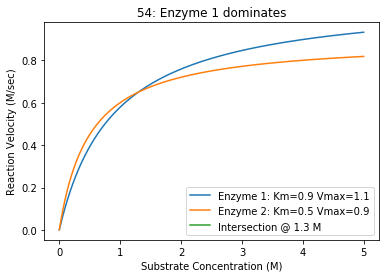

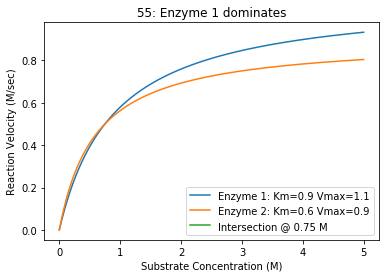

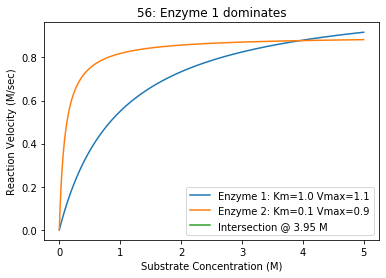

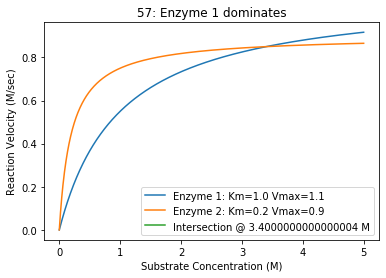

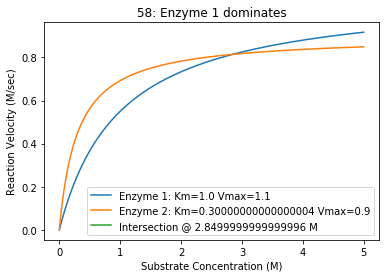

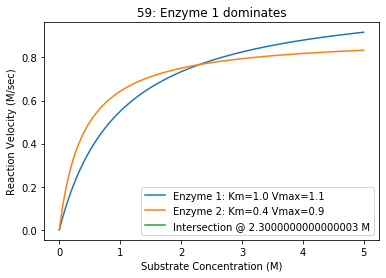

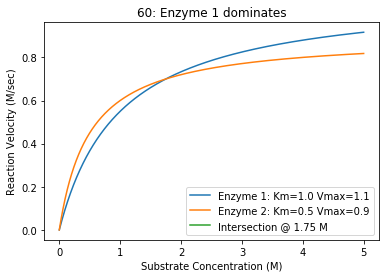

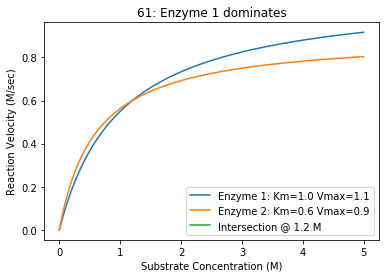

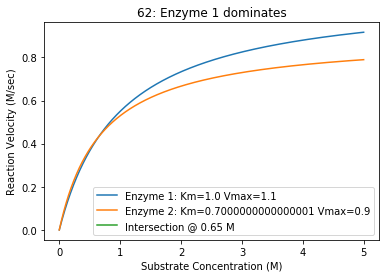

In [4]:
""" Plot Interesting Ones """
# Get Km and Vmax combos from the data
combos = [(km, vmax) for (km, vmax) in data]
combos = product(combos, combos)

# to keep from repeating work record km/vmax
done = list()

# to keep a list of non-intersecting examples
rejects = list()

# to keep a count of plots produced for labeling
count = 0

# plot each combo of km/vmax


for c1, c2 in combos:
    combo = (c1, c2)
    
    # ignore enzyme with the same kinetics
    if c1 == c2:
        continue
    elif combo in done:
        # don't repeat work
        continue
    else:
        # don't repeat work
        done.append(combo)
        done.append(reversed(combo))
        
    # Try to find interesting ones
    intersect = intersection(data[c1], data[c2])
    if not intersect:
        rejects.append((c1, c2))
        continue
        
    # Convert intersect into concentration
    concen = intersect / NUM_S * MAX_S
        
    count += 1
        
    plt.plot(S, data[c1], label=f'Enzyme 1: Km={c1[0]} Vmax={c1[1]}')
    plt.plot(S, data[c2], label=f'Enzyme 2: Km={c2[0]} Vmax={c2[1]}')
    plt.plot([], [], label=f'Intersection @ {concen} M') # GROSS
    
    plt.xlabel('Substrate Concentration (M)')
    plt.ylabel('Reaction Velocity (M/sec)')
    plt.title(f'{count}: Enzyme {dominant(data[c1], data[c2])} dominates')
    plt.legend()
    
    plt.show()   
    

## Find Examples with no interseciton


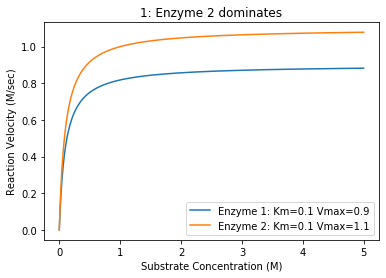

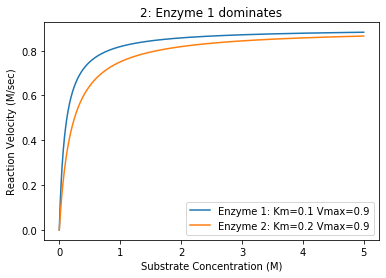

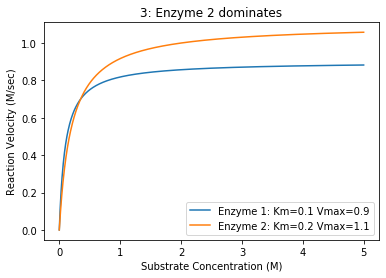

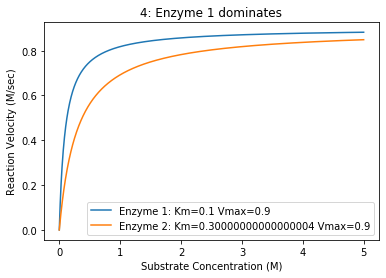

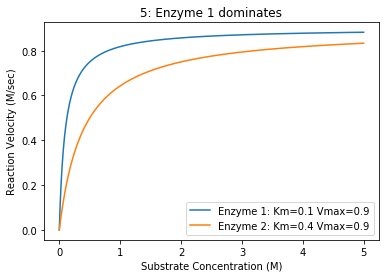

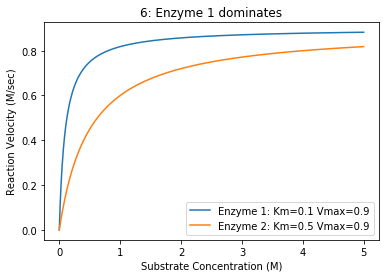

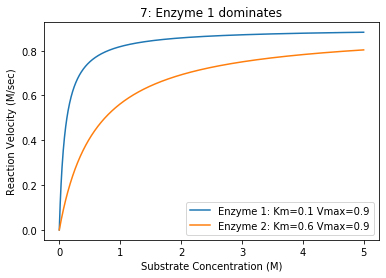

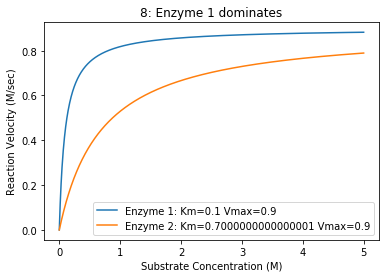

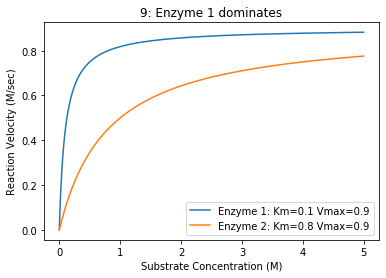

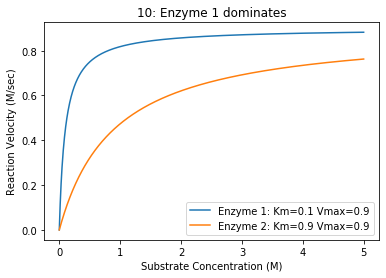

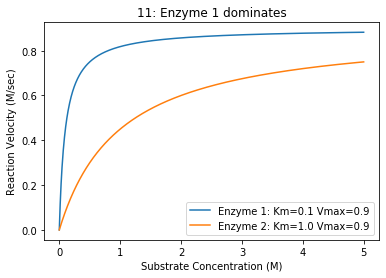

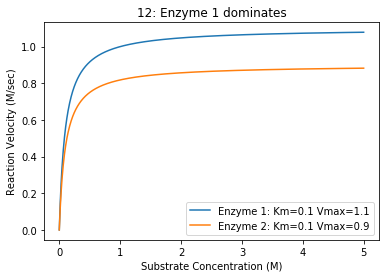

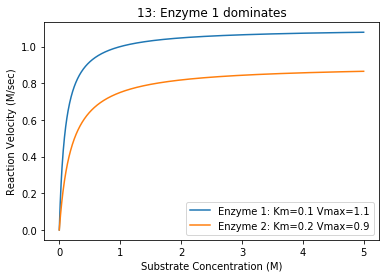

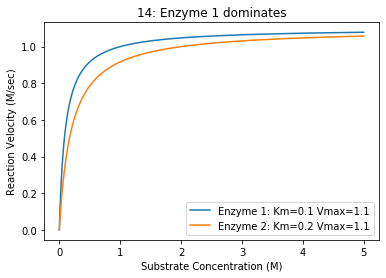

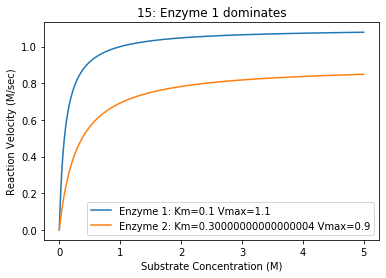

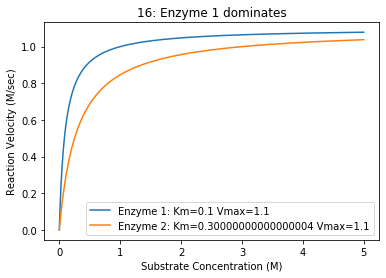

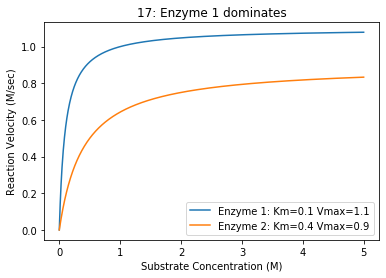

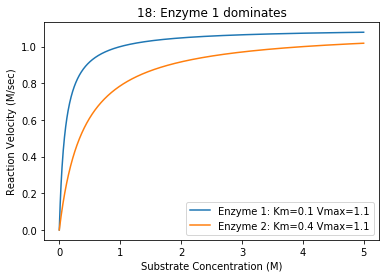

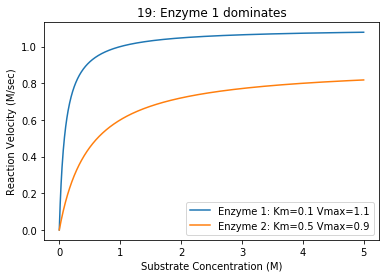

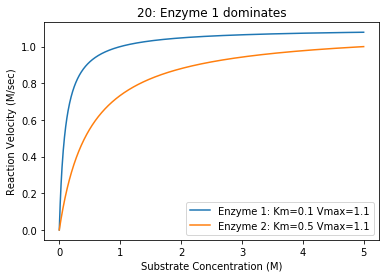

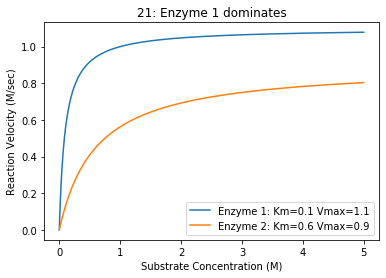

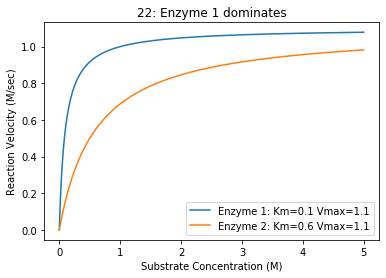

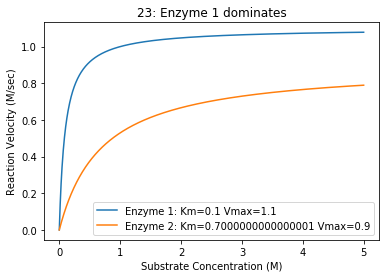

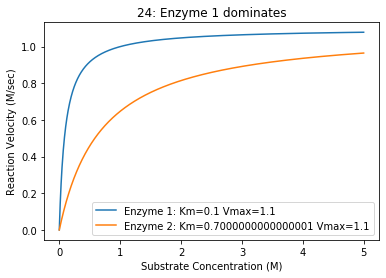

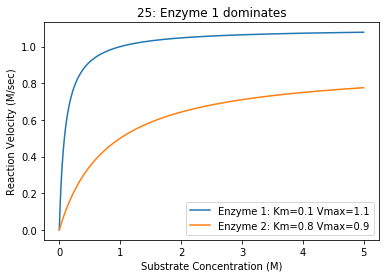

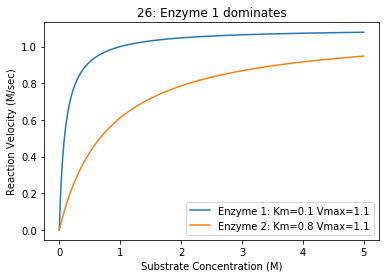

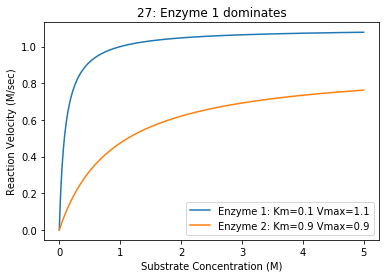

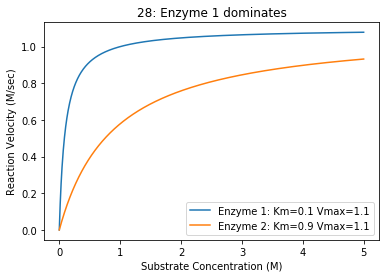

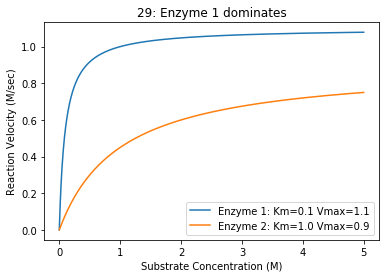

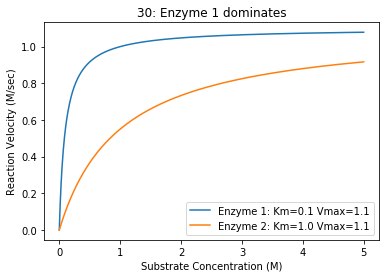

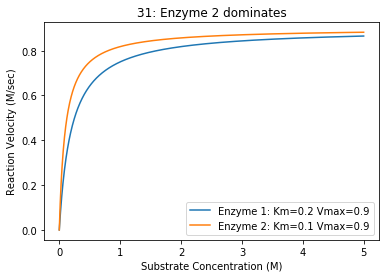

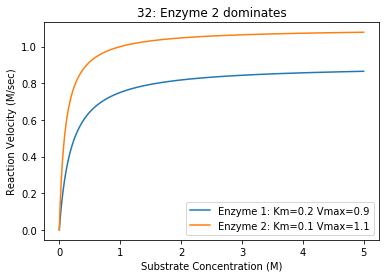

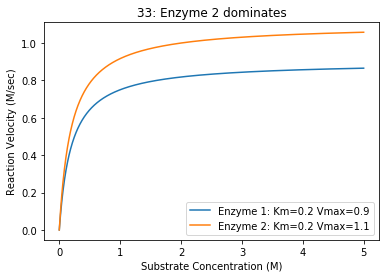

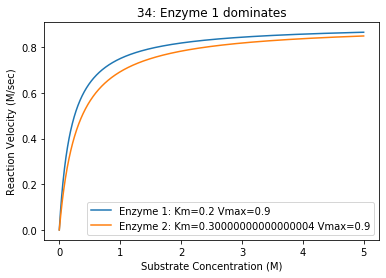

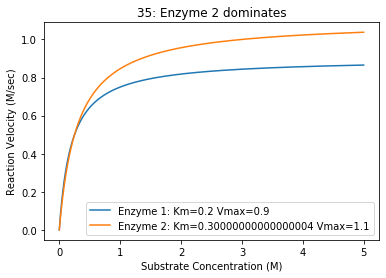

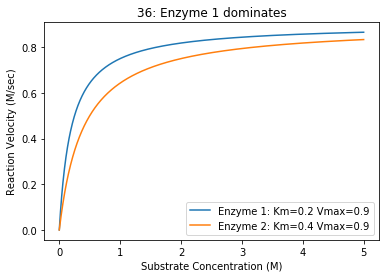

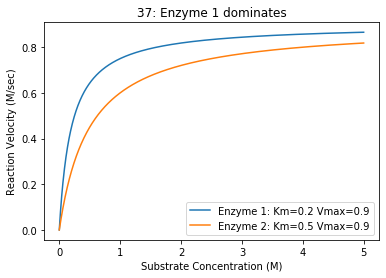

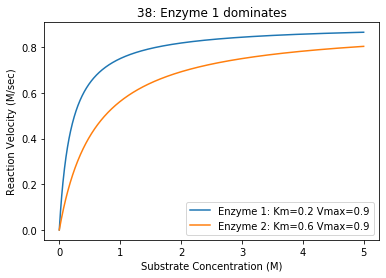

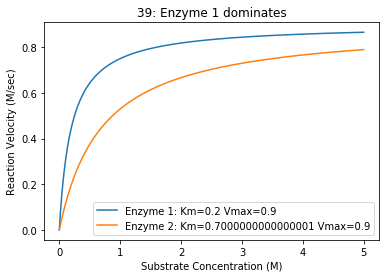

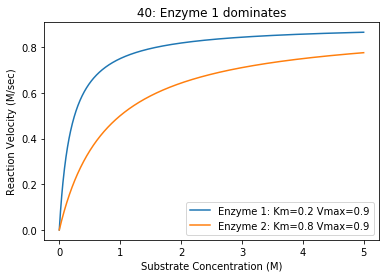

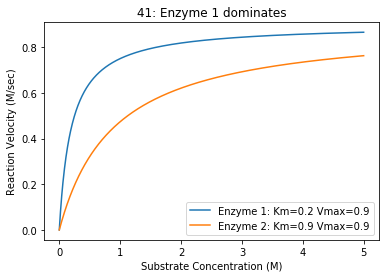

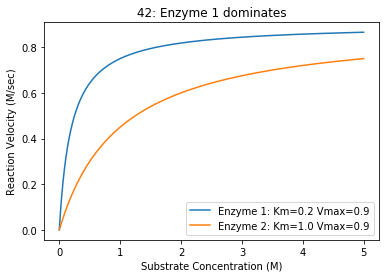

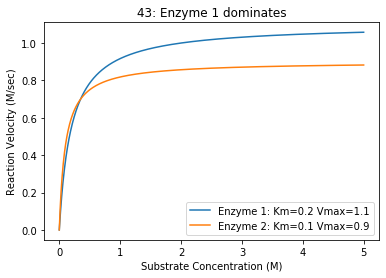

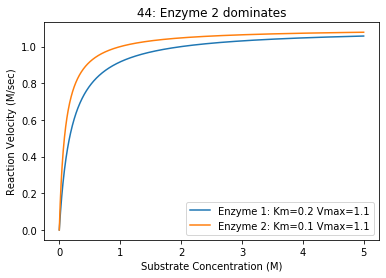

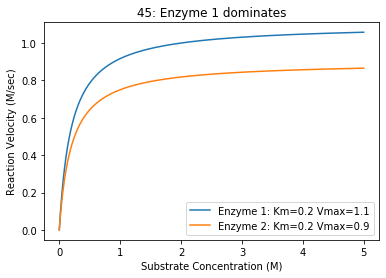

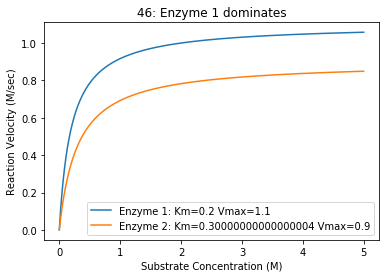

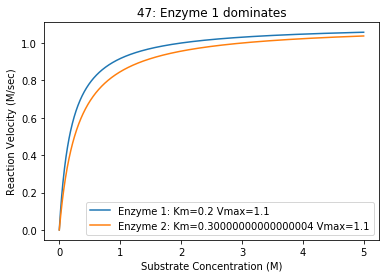

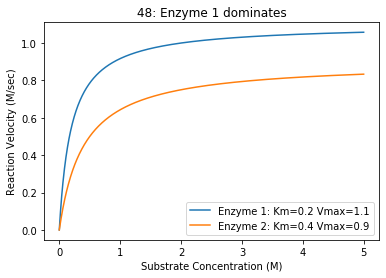

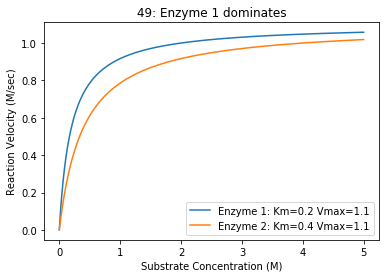

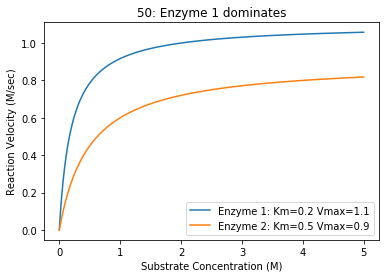

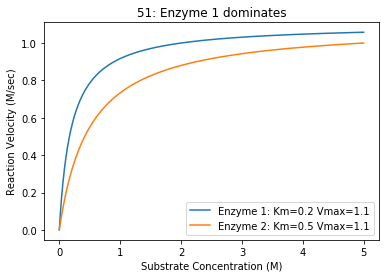

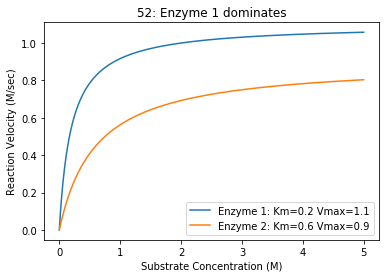

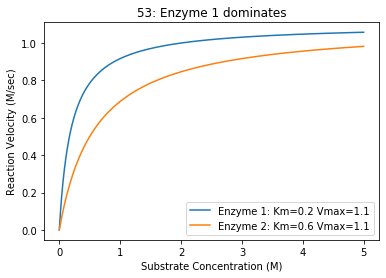

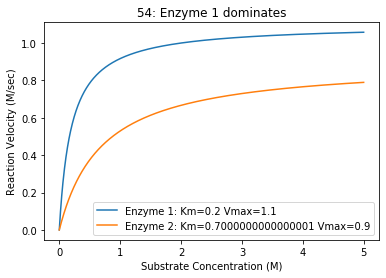

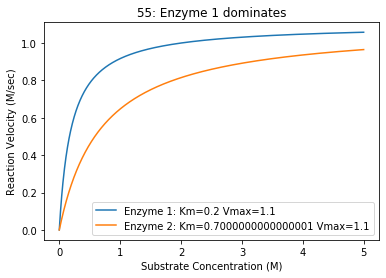

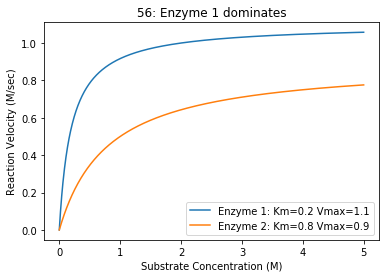

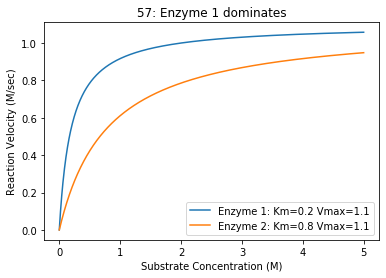

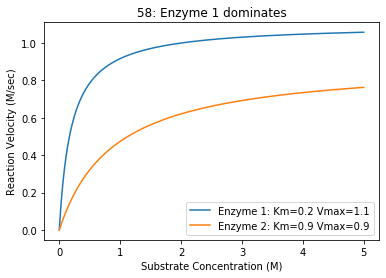

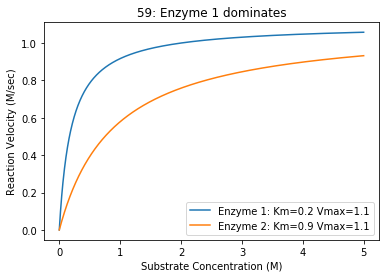

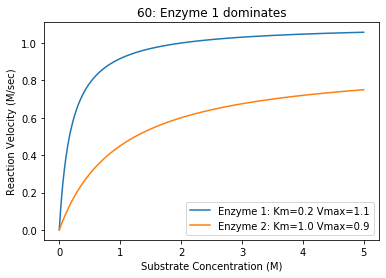

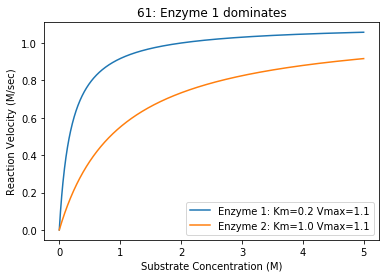

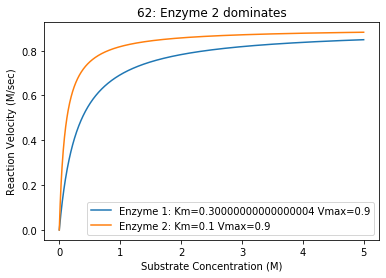

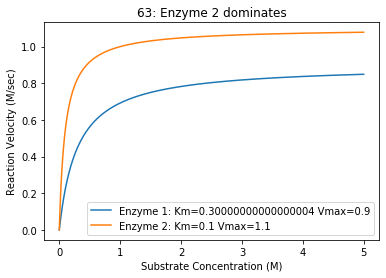

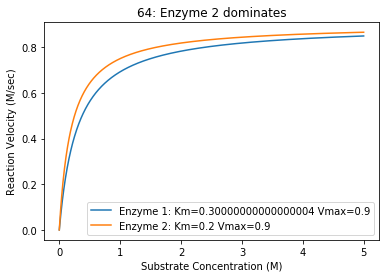

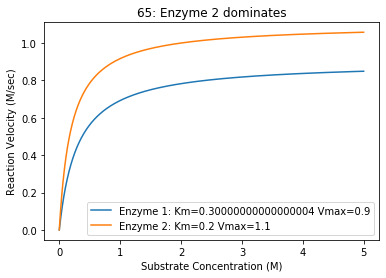

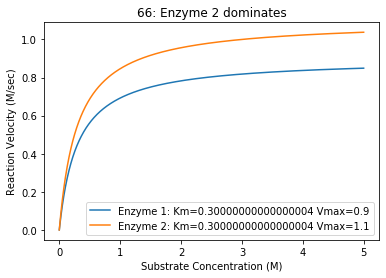

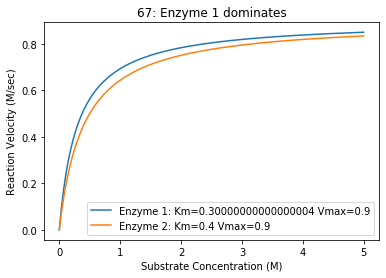

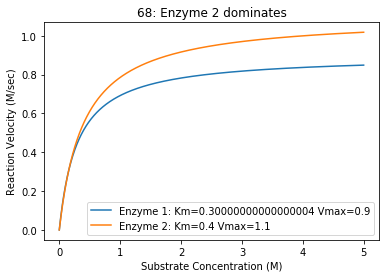

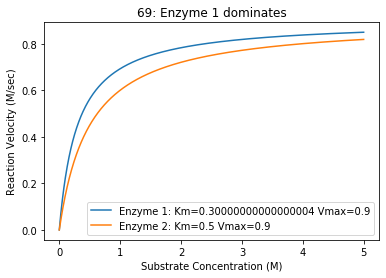

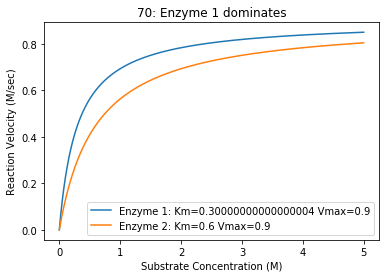

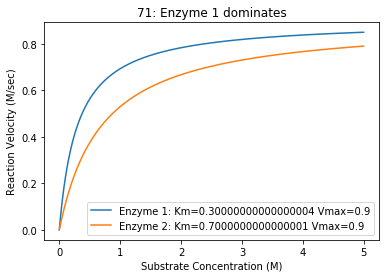

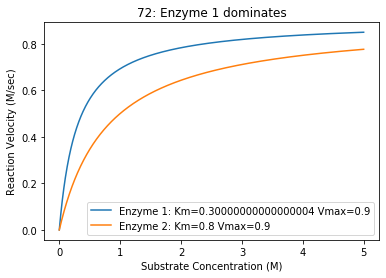

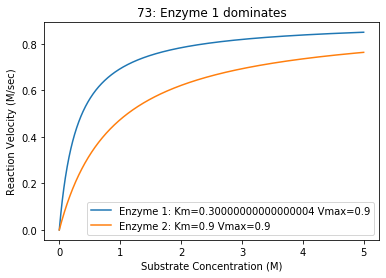

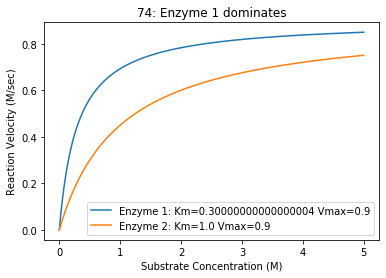

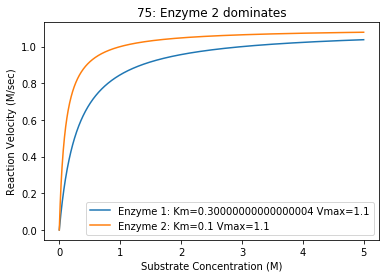

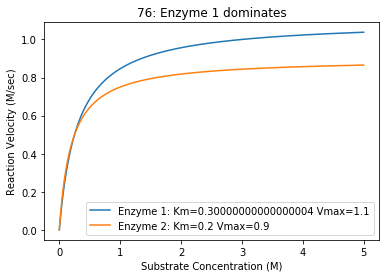

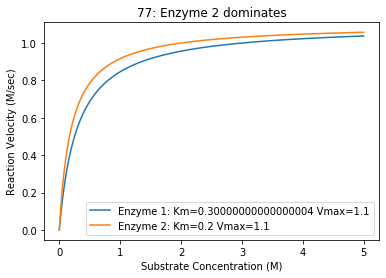

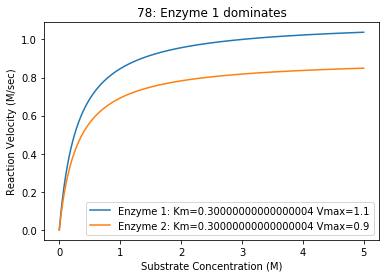

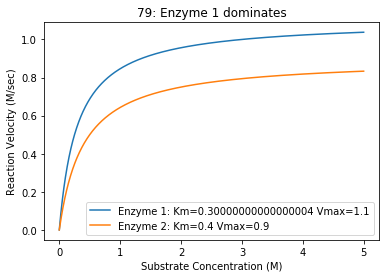

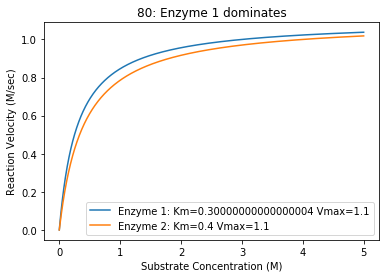

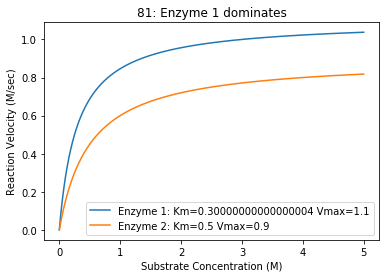

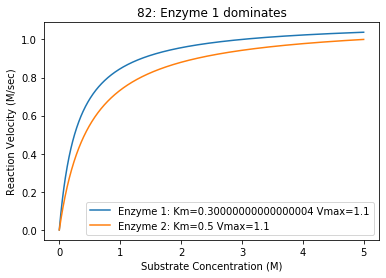

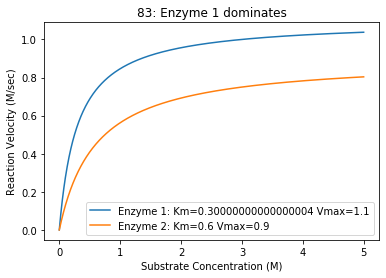

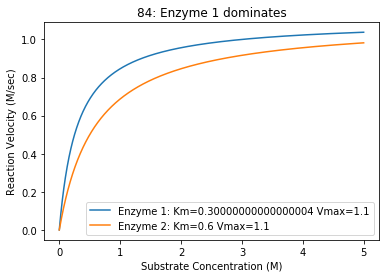

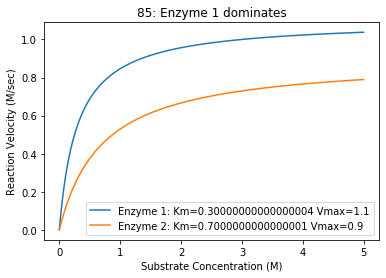

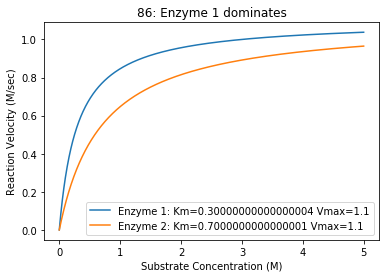

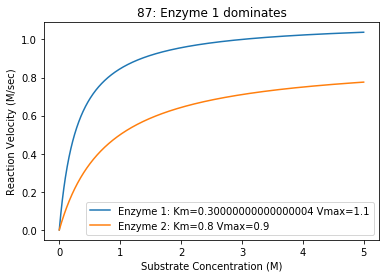

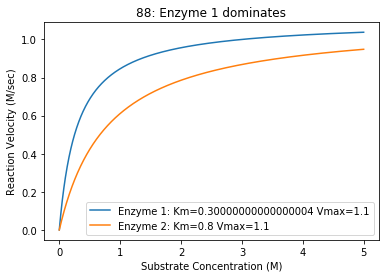

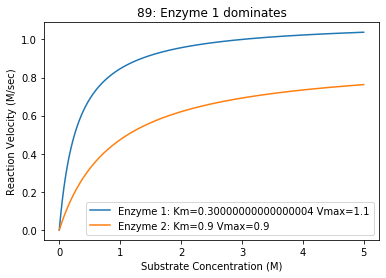

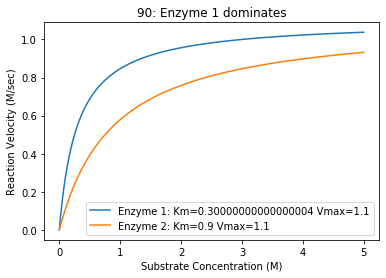

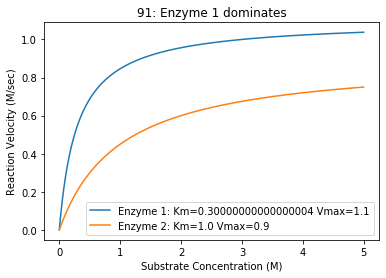

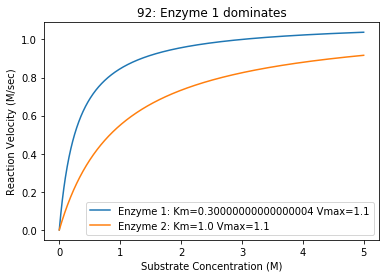

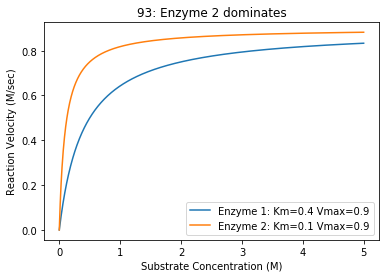

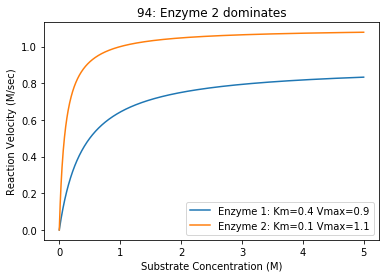

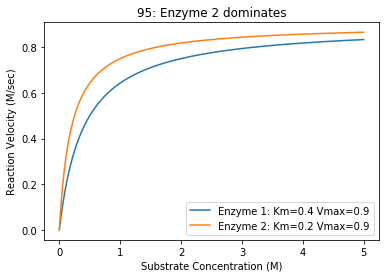

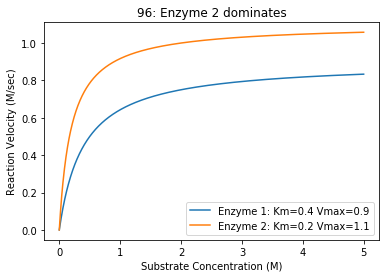

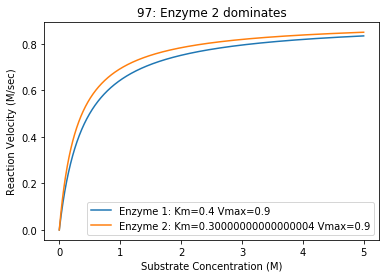

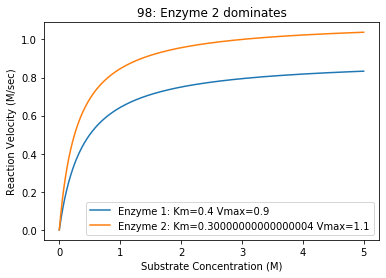

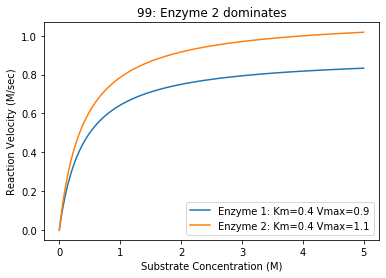

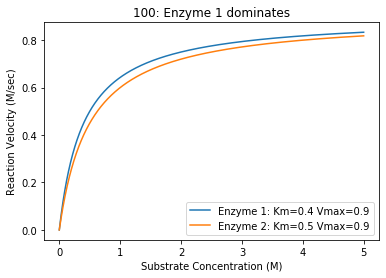

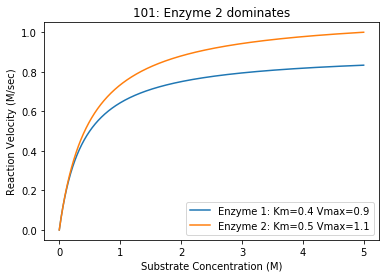

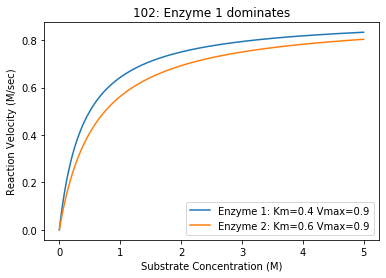

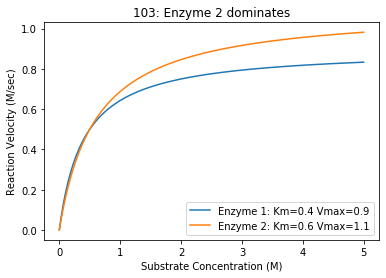

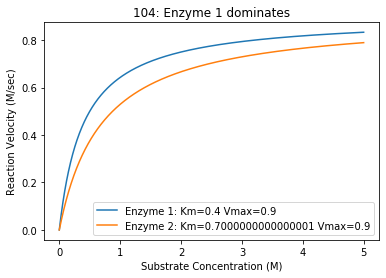

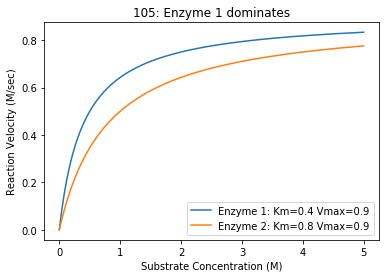

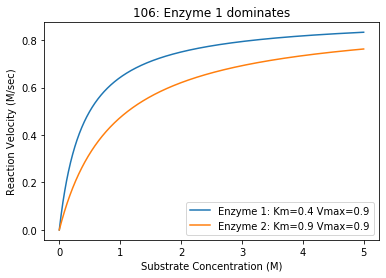

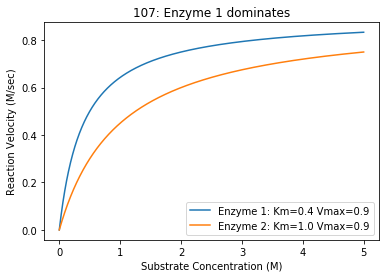

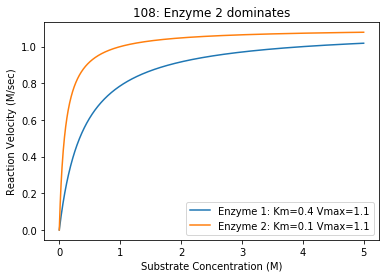

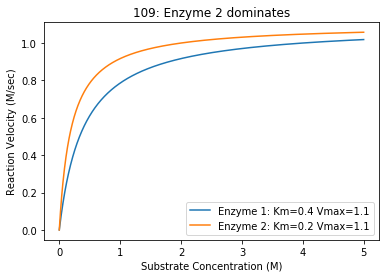

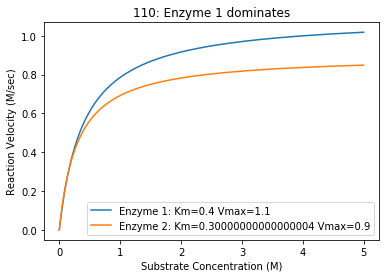

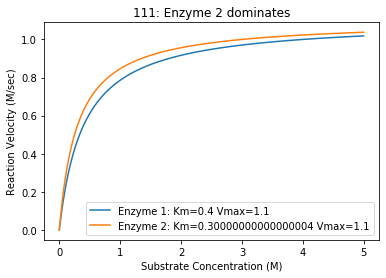

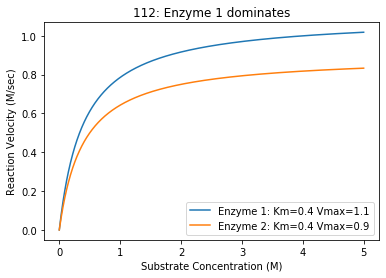

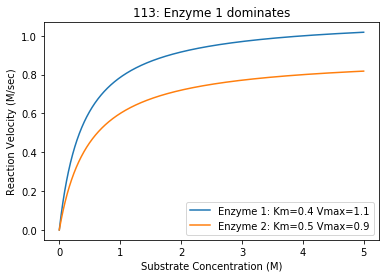

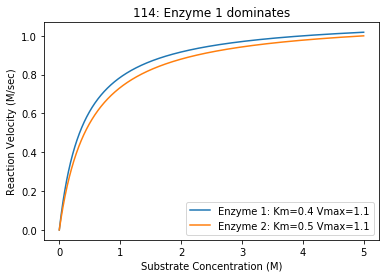

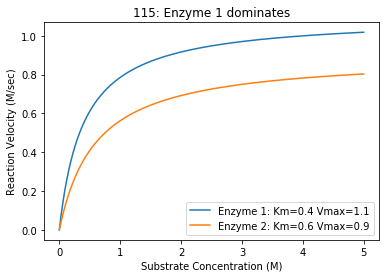

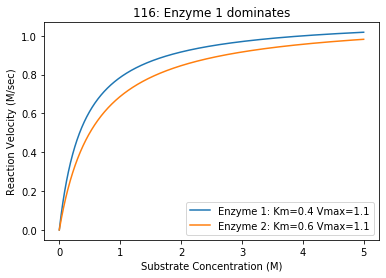

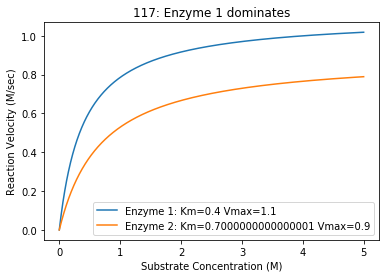

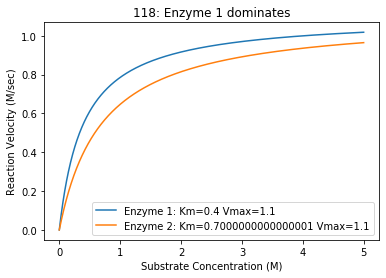

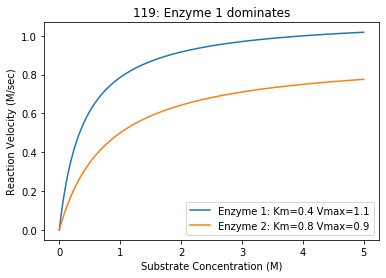

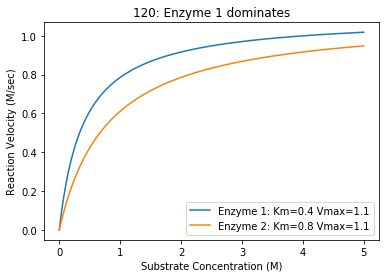

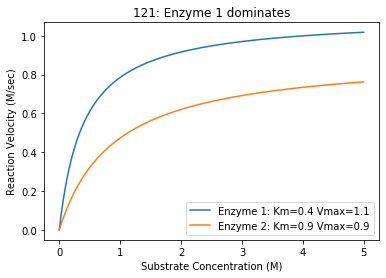

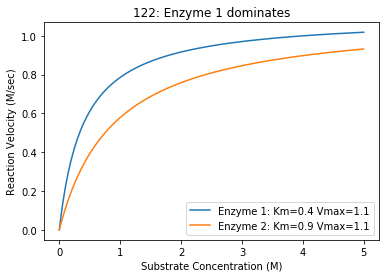

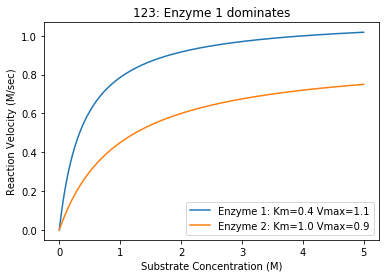

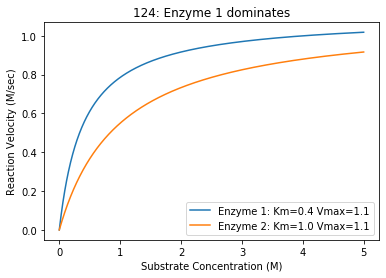

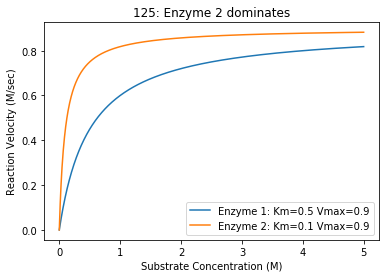

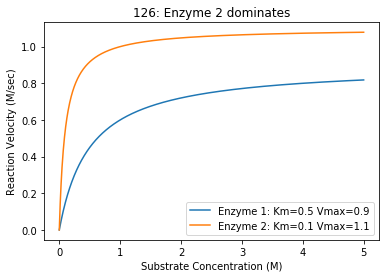

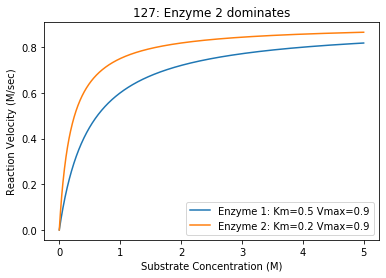

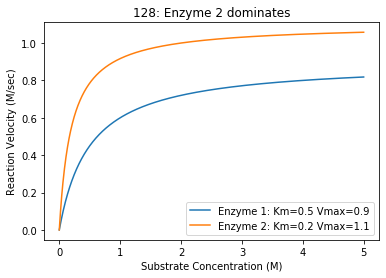

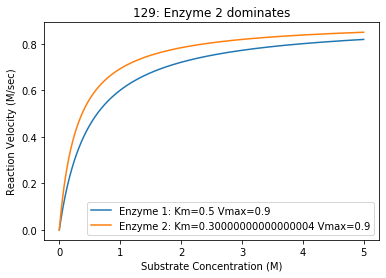

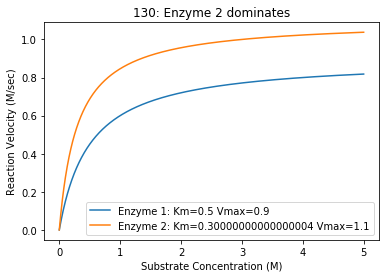

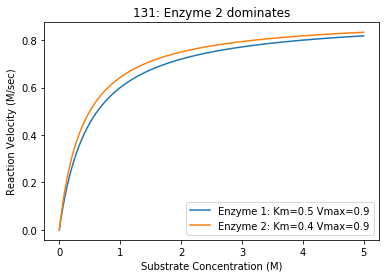

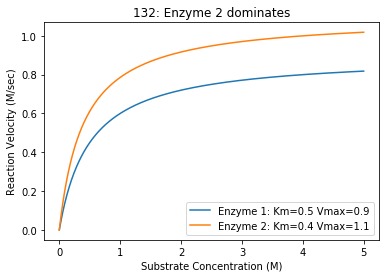

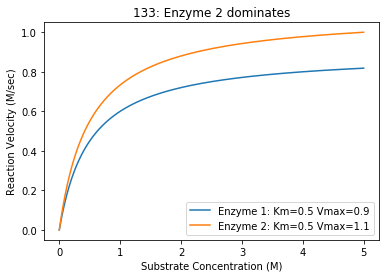

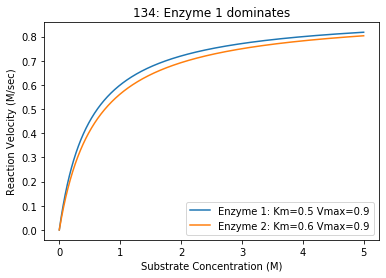

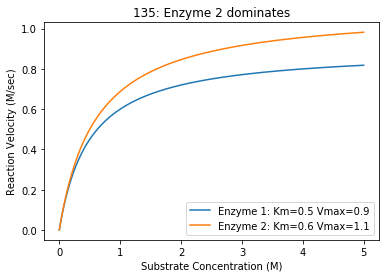

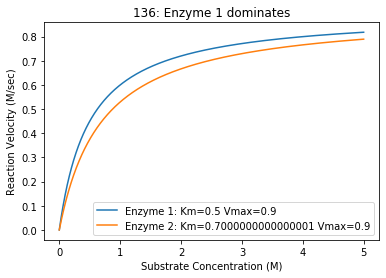

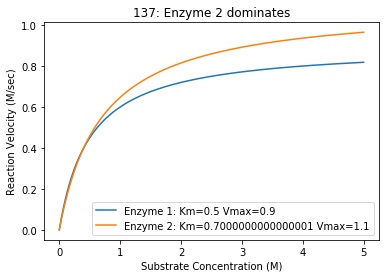

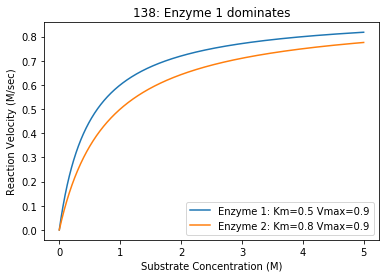

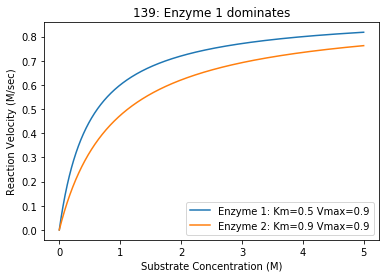

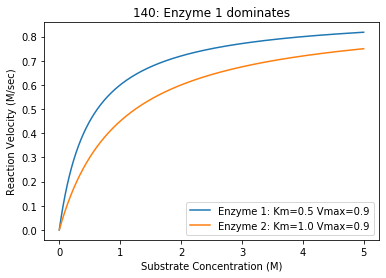

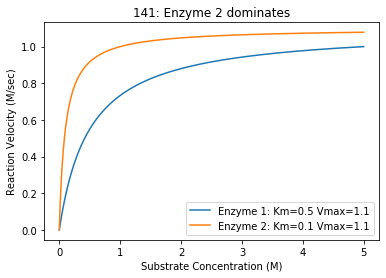

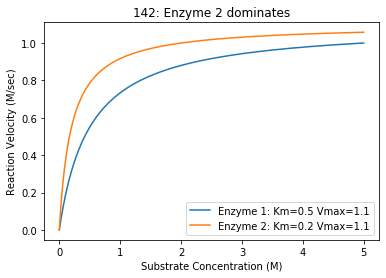

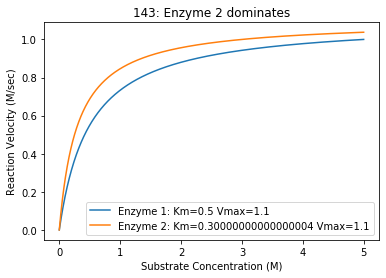

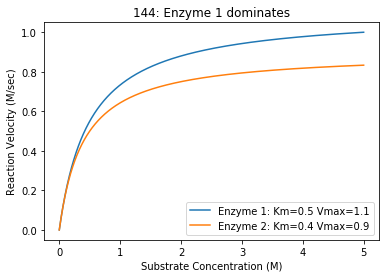

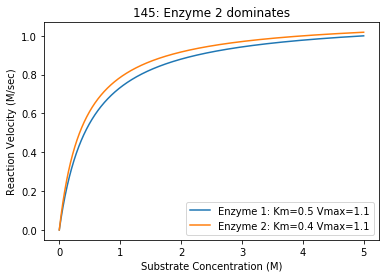

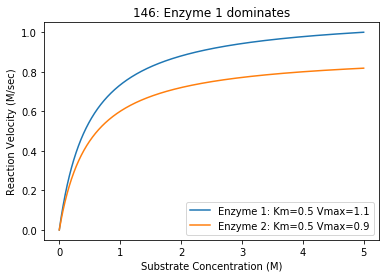

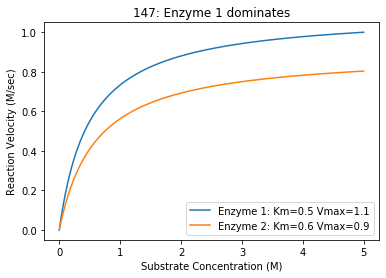

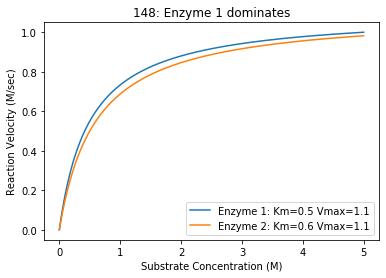

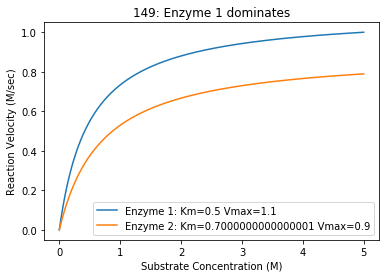

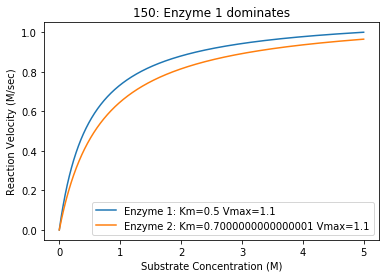

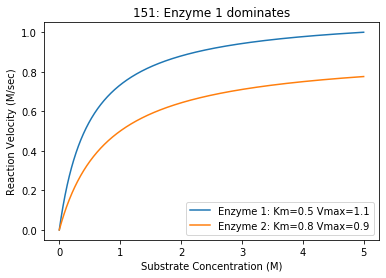

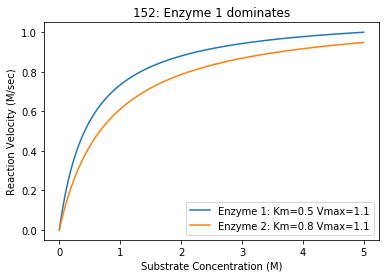

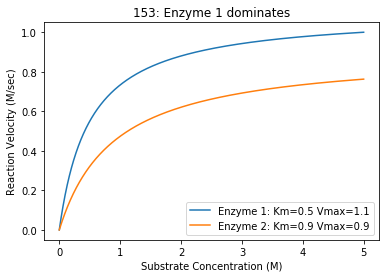

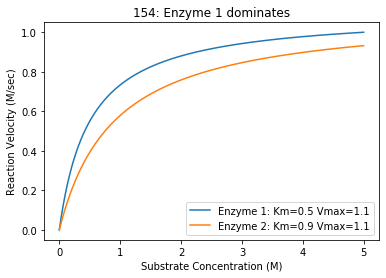

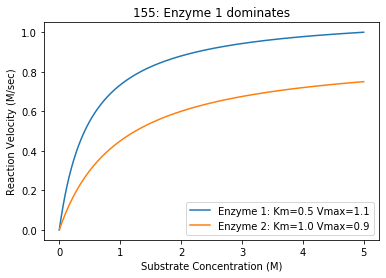

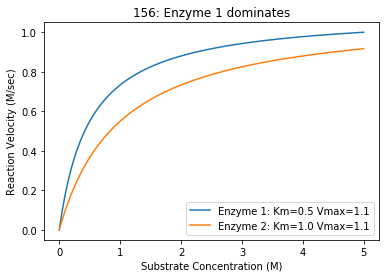

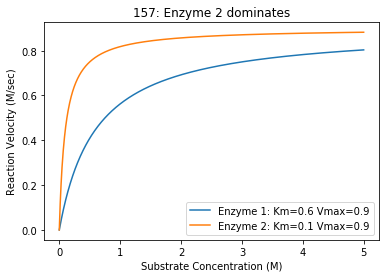

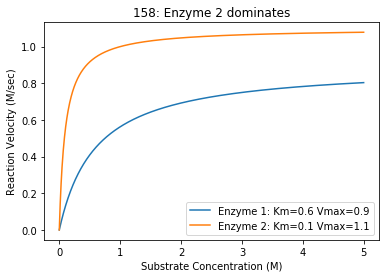

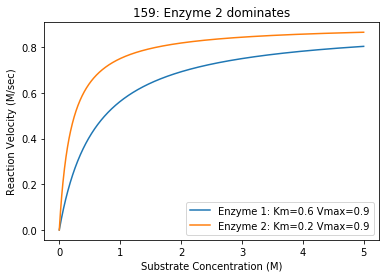

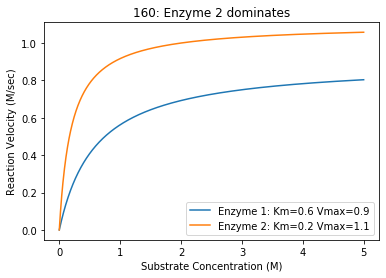

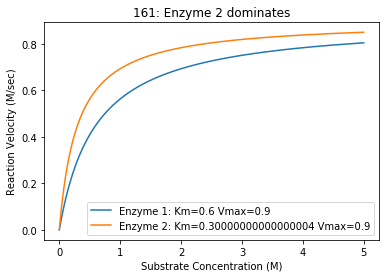

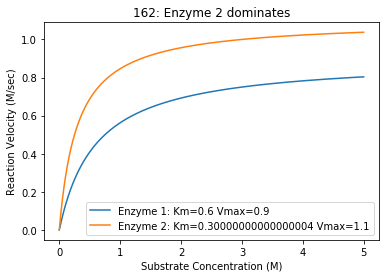

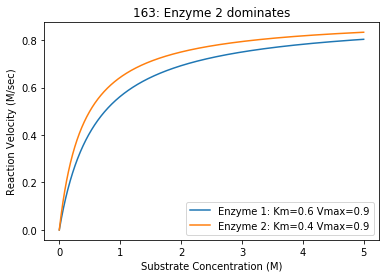

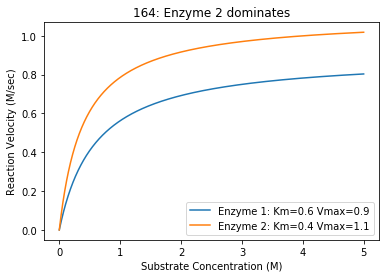

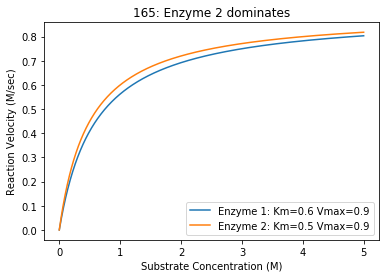

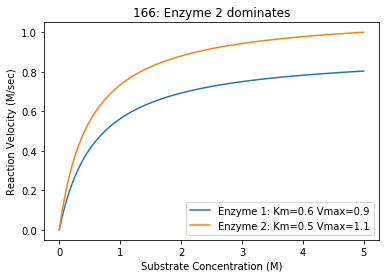

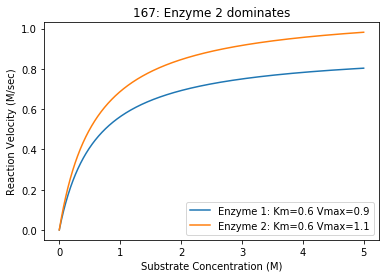

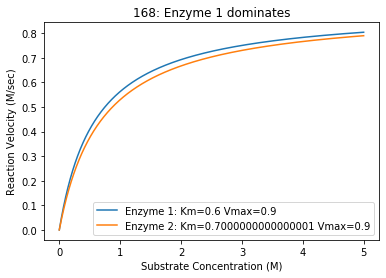

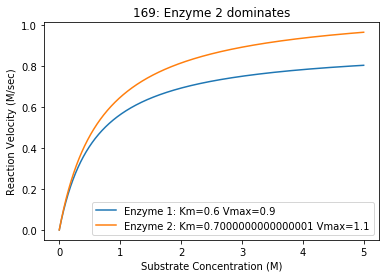

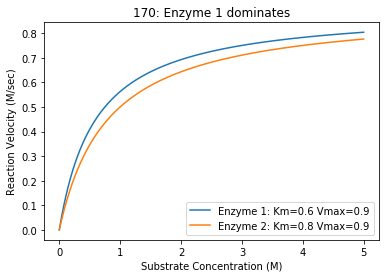

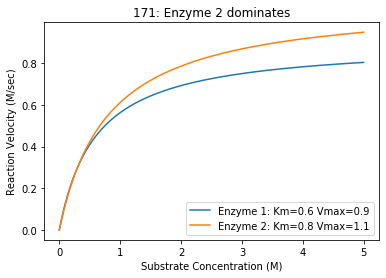

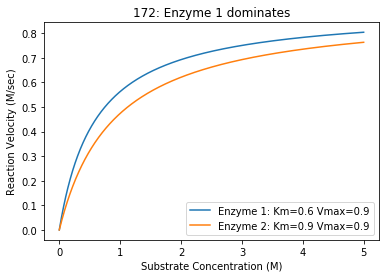

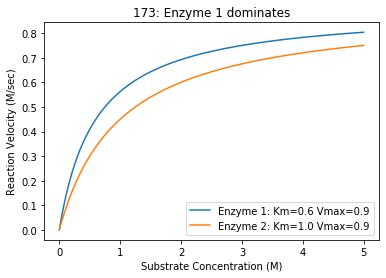

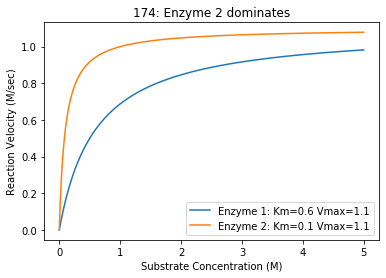

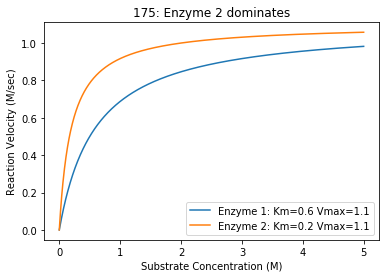

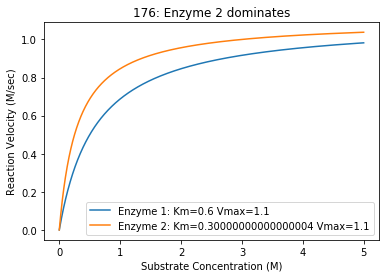

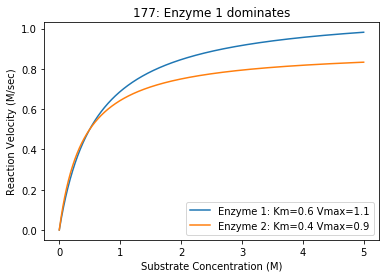

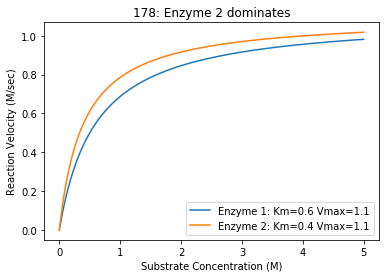

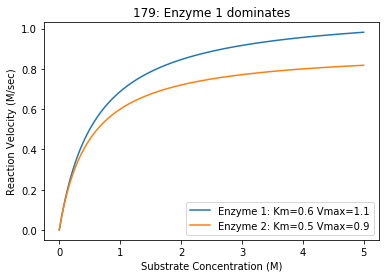

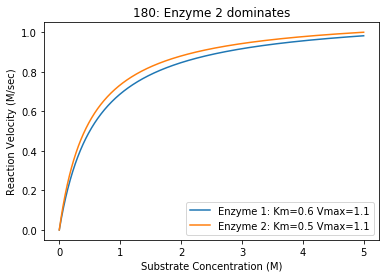

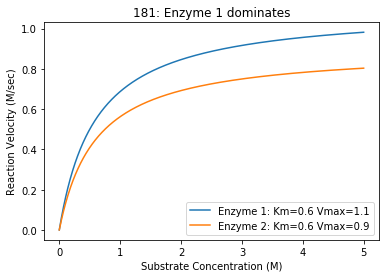

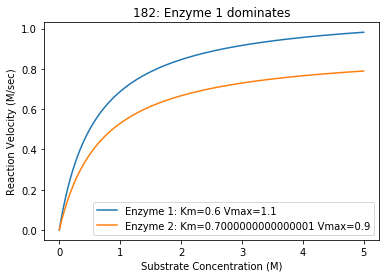

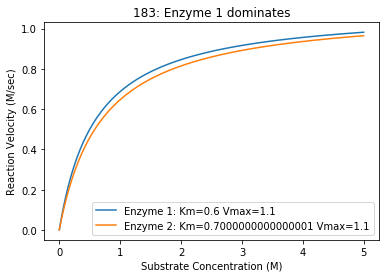

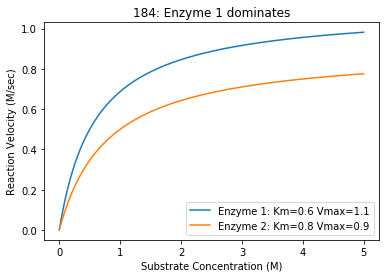

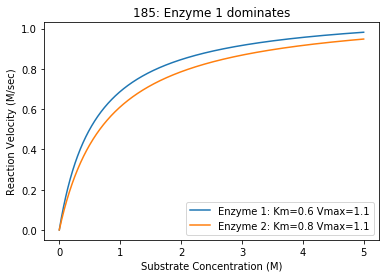

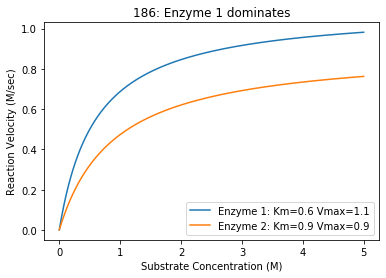

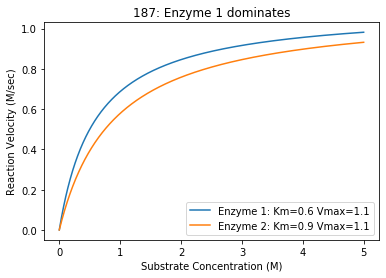

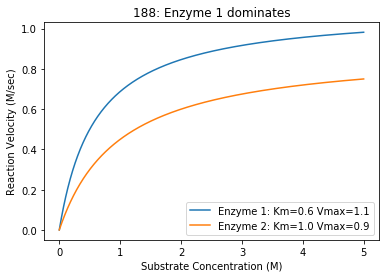

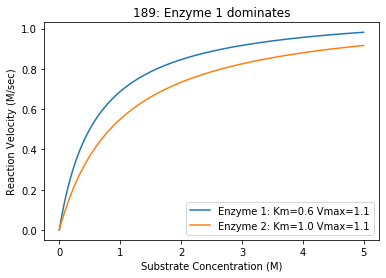

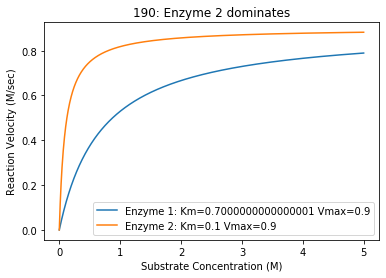

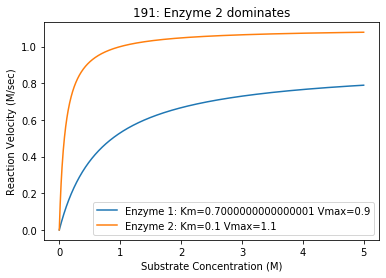

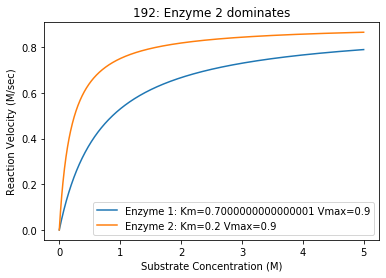

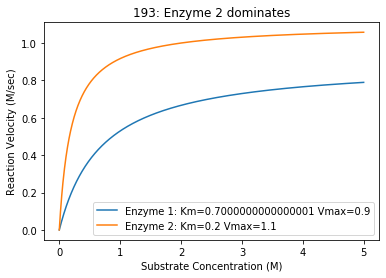

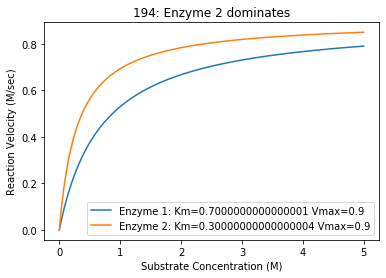

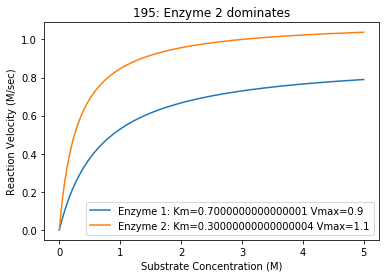

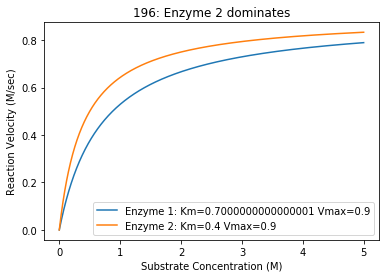

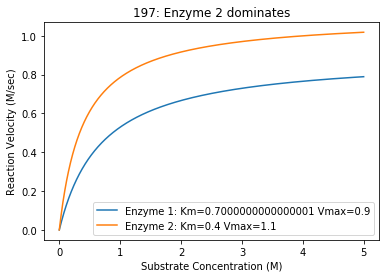

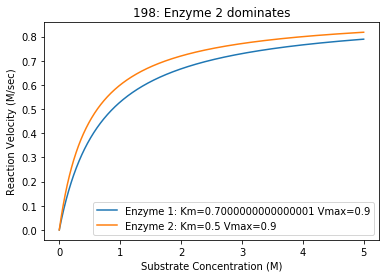

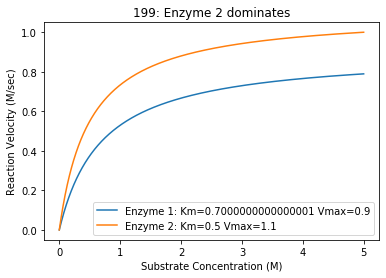

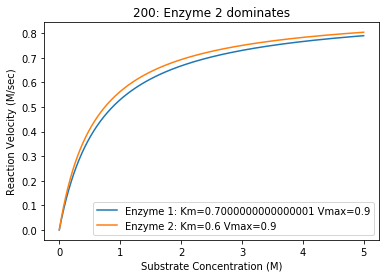

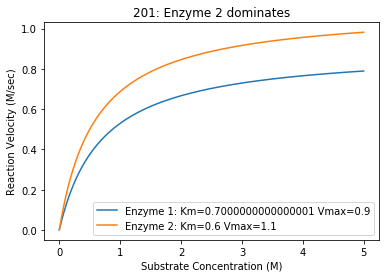

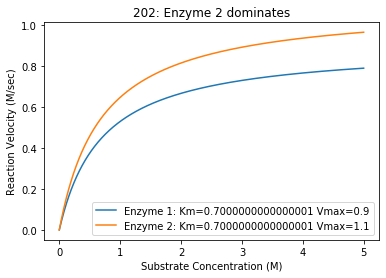

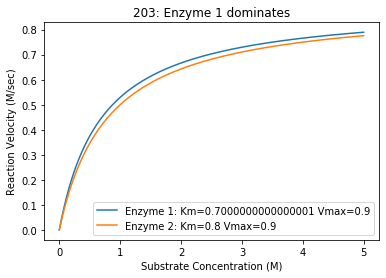

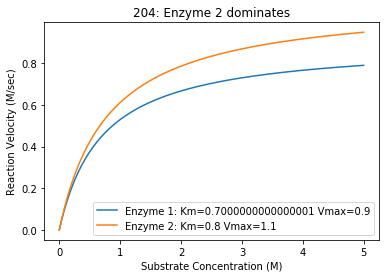

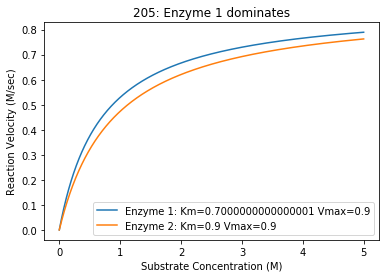

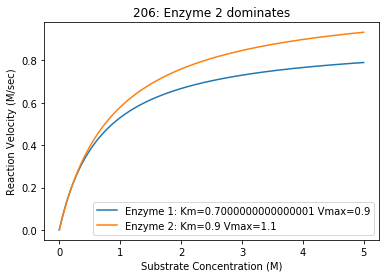

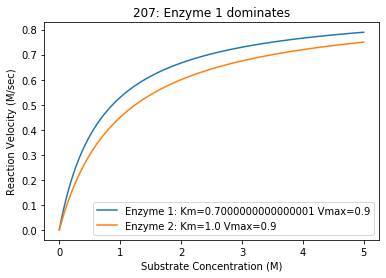

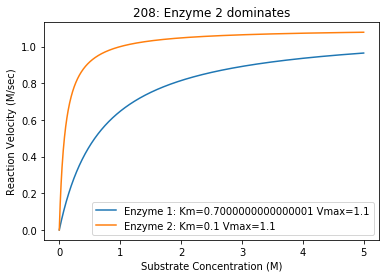

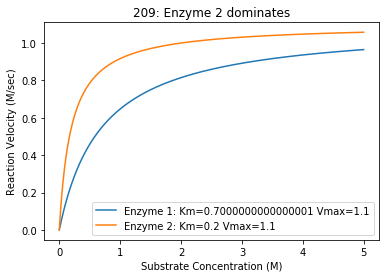

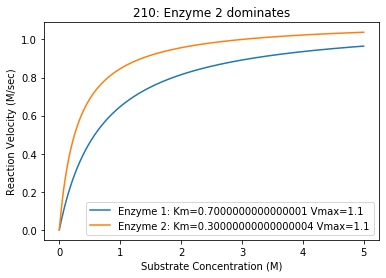

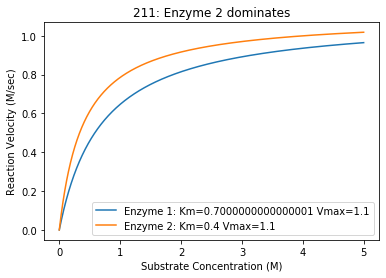

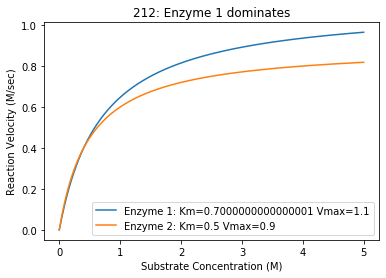

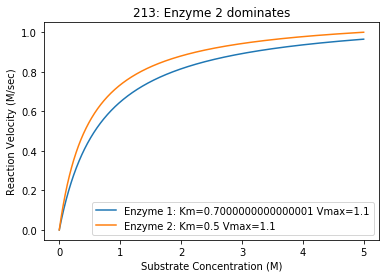

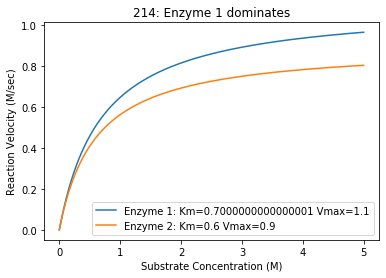

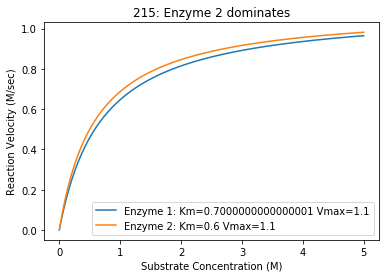

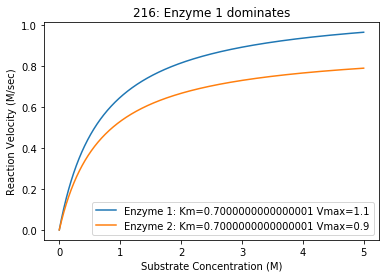

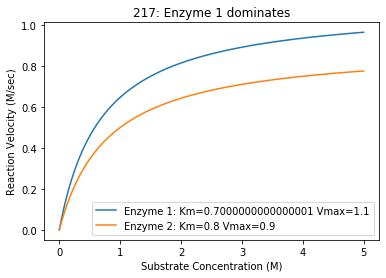

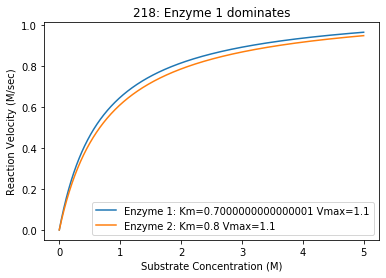

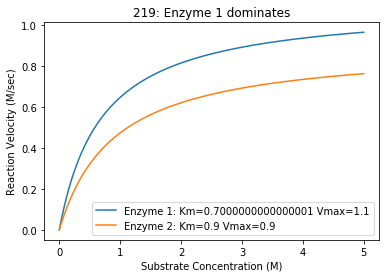

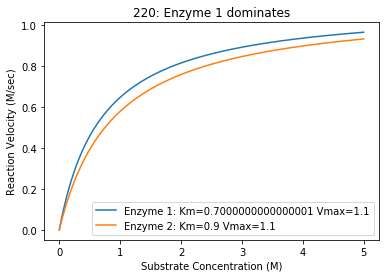

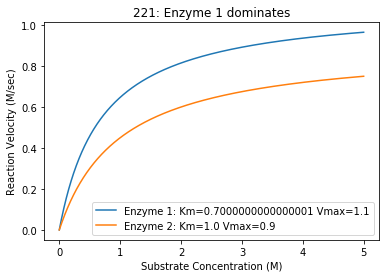

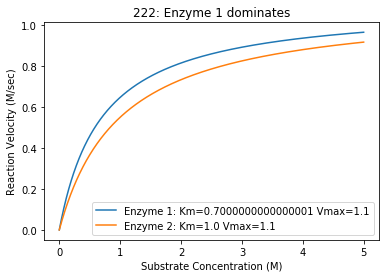

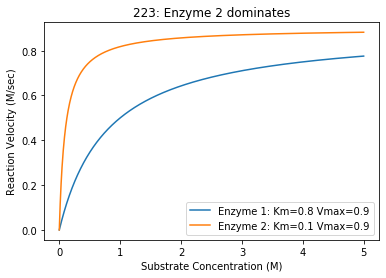

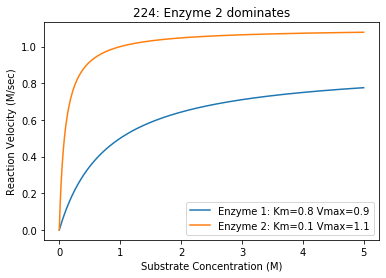

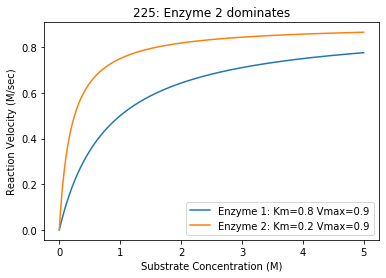

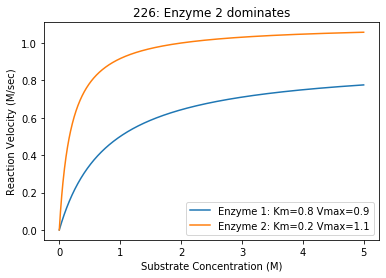

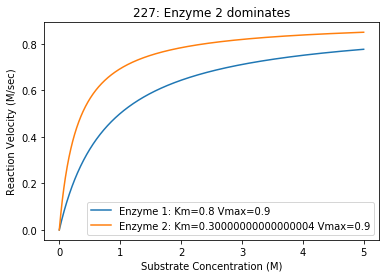

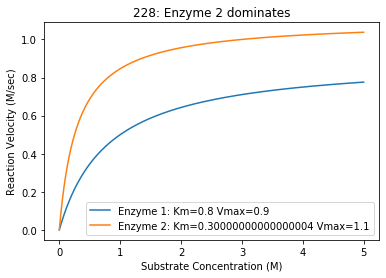

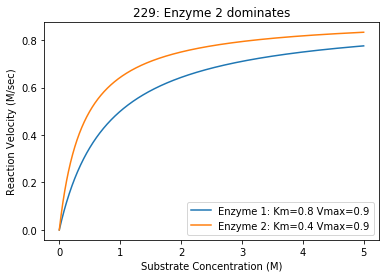

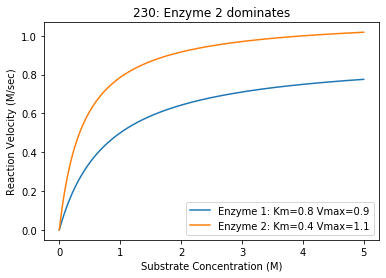

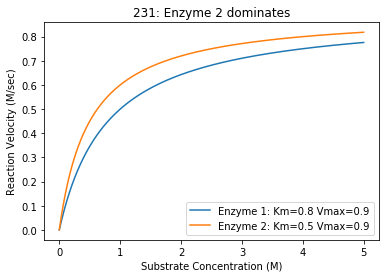

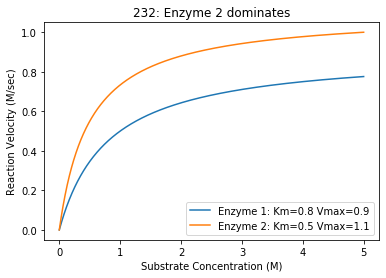

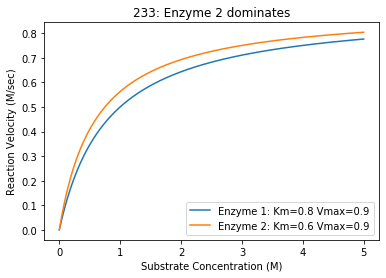

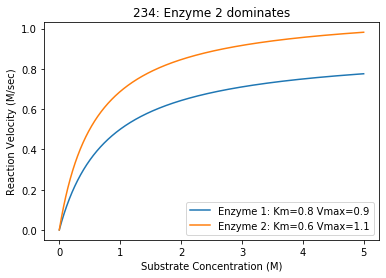

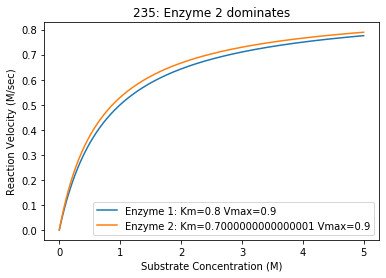

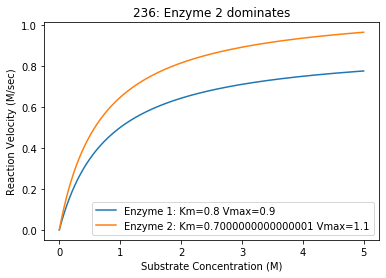

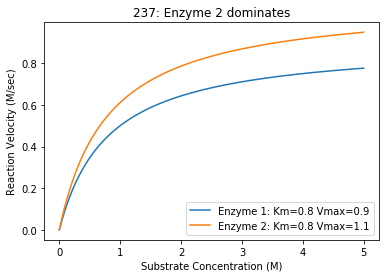

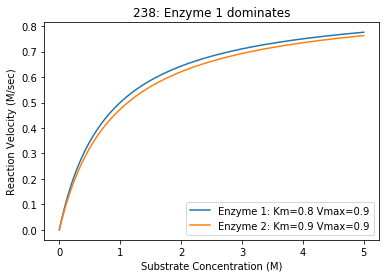

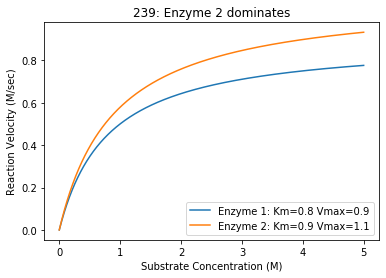

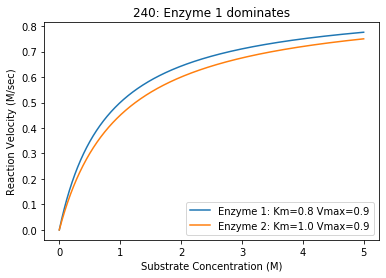

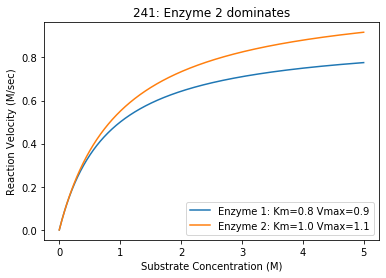

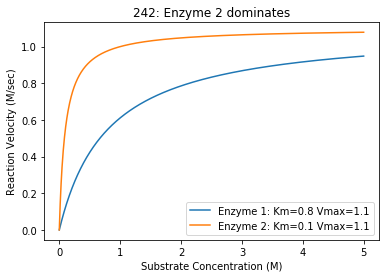

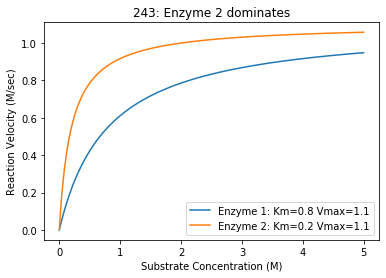

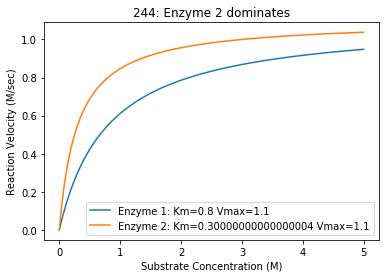

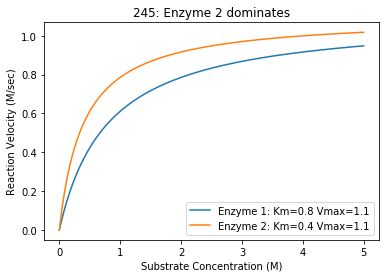

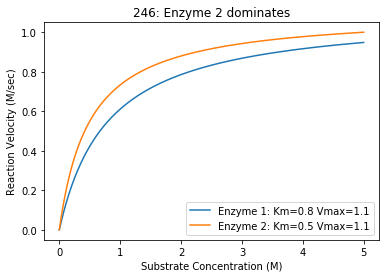

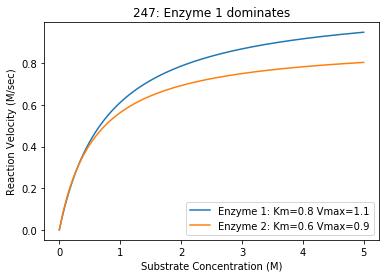

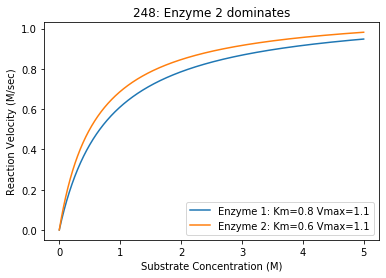

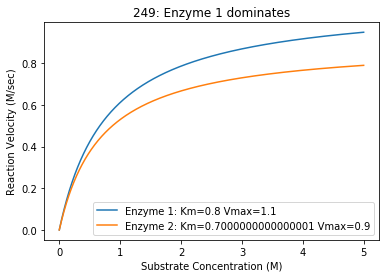

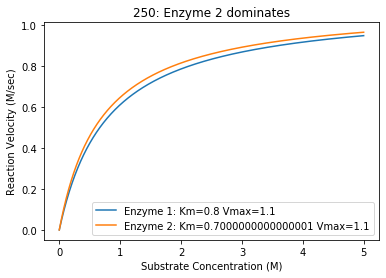

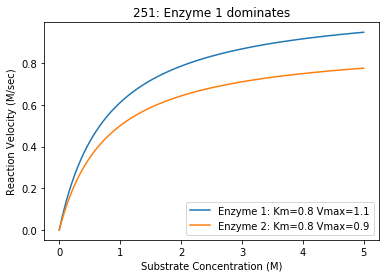

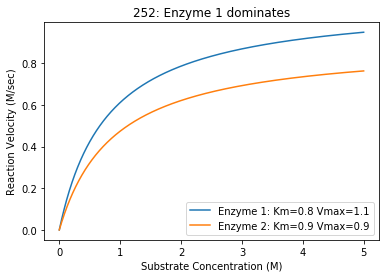

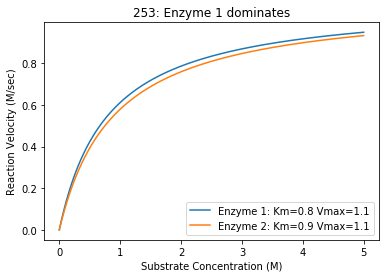

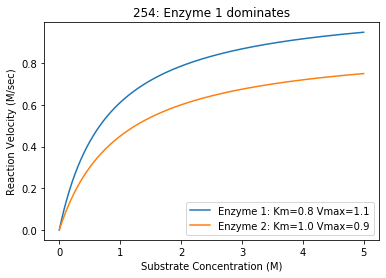

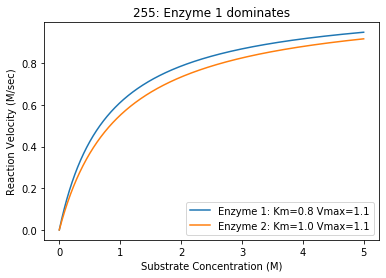

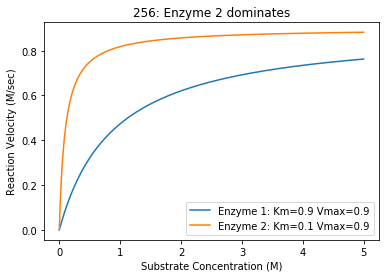

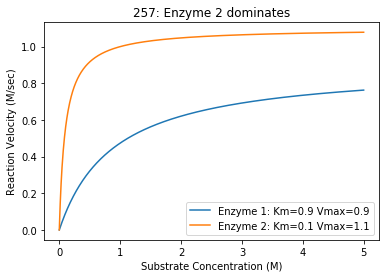

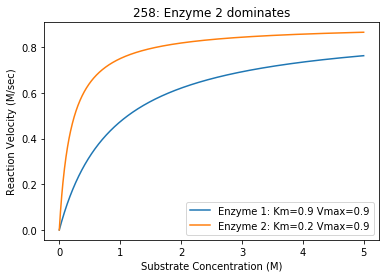

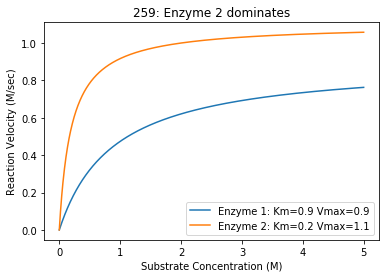

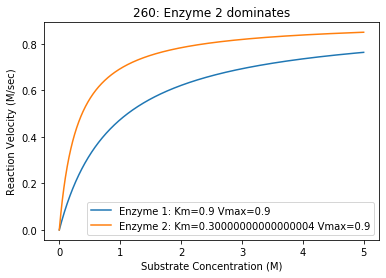

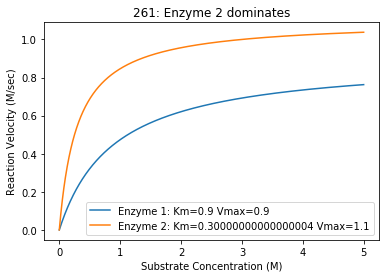

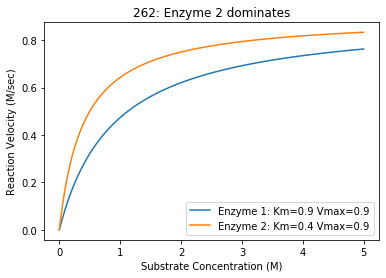

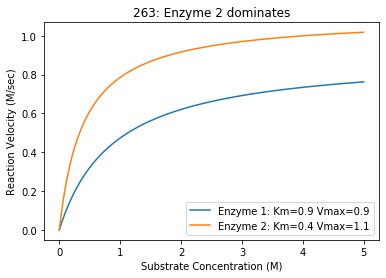

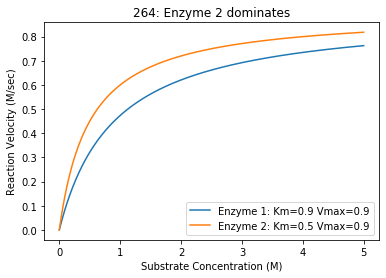

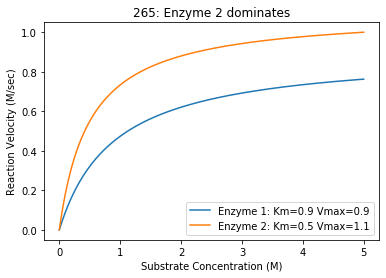

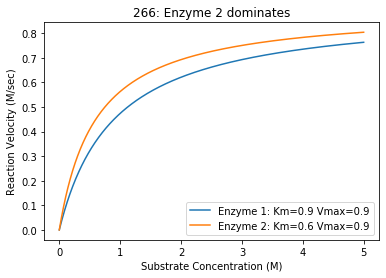

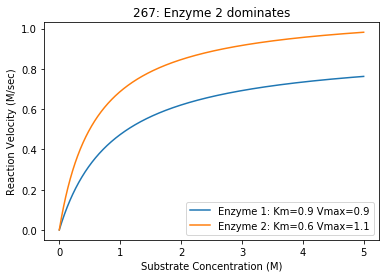

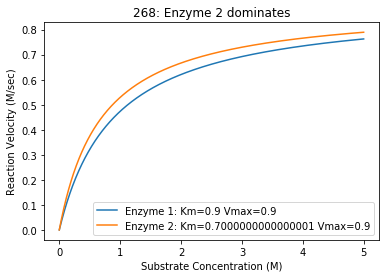

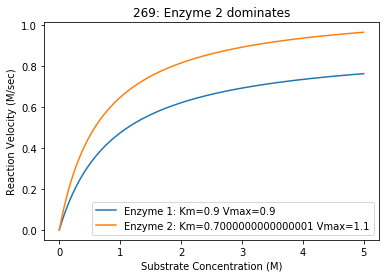

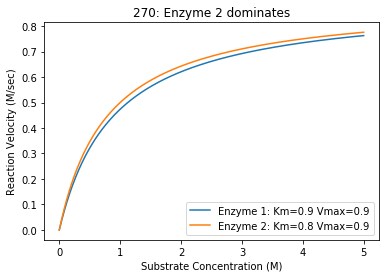

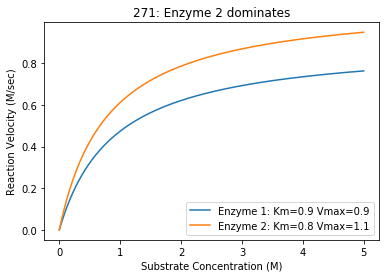

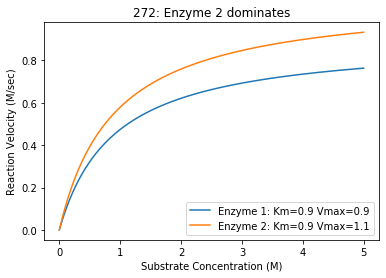

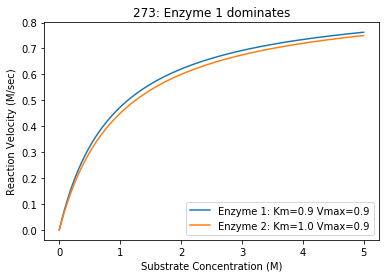

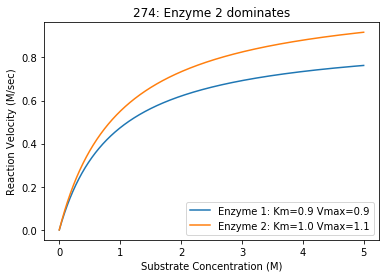

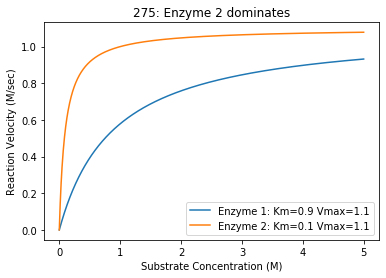

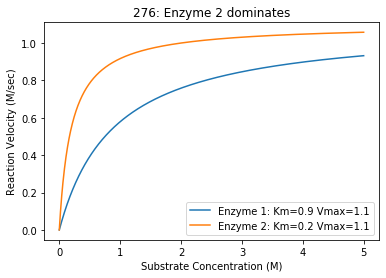

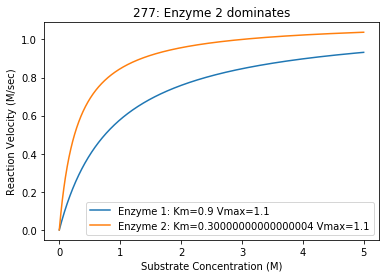

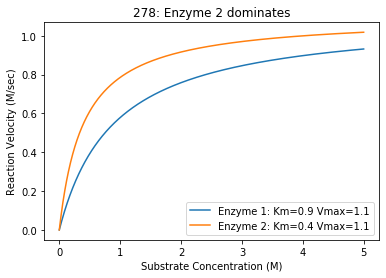

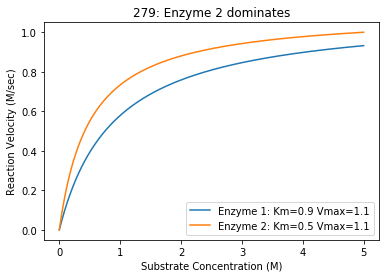

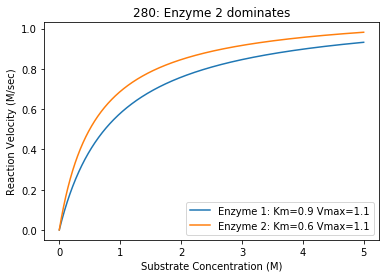

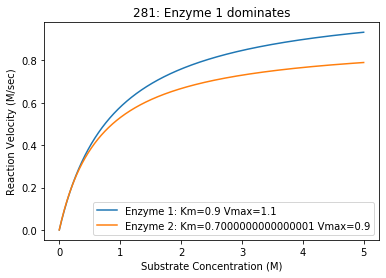

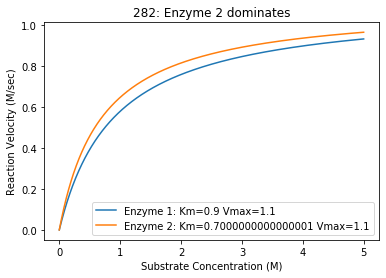

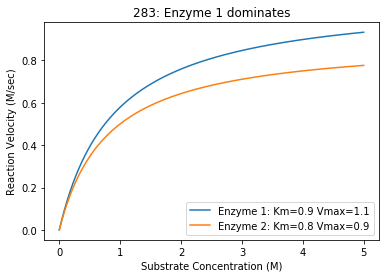

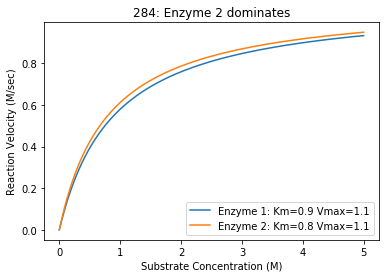

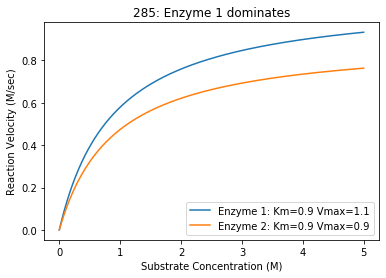

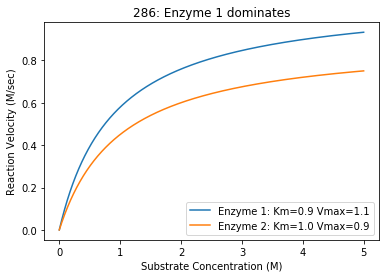

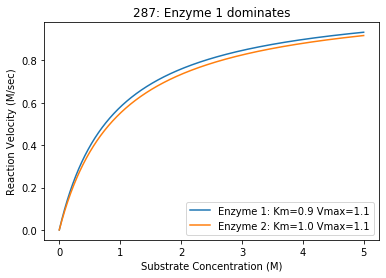

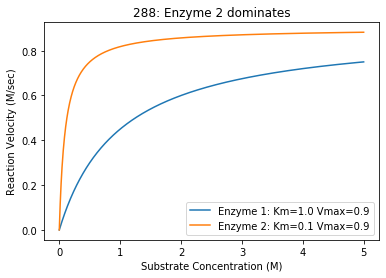

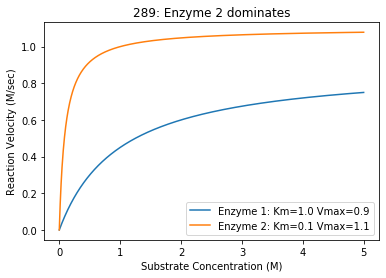

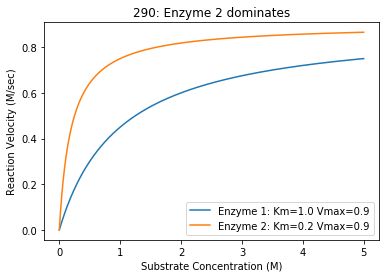

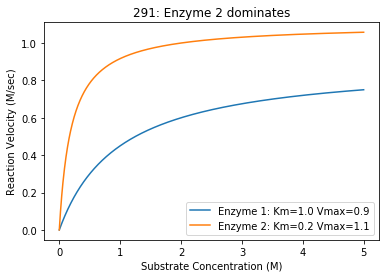

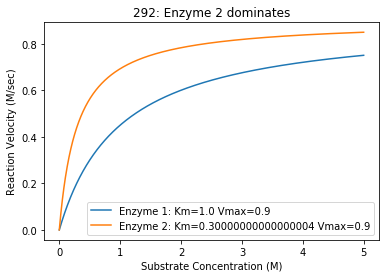

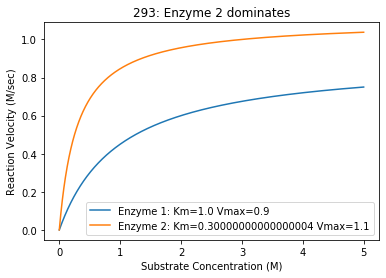

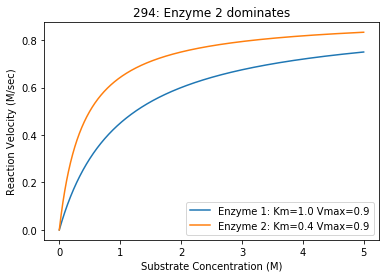

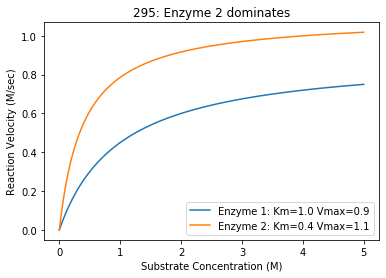

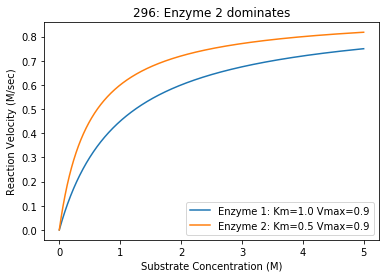

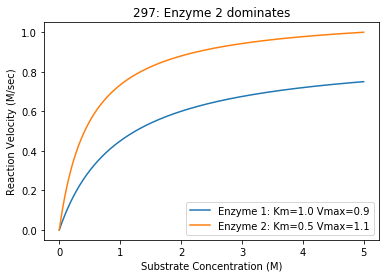

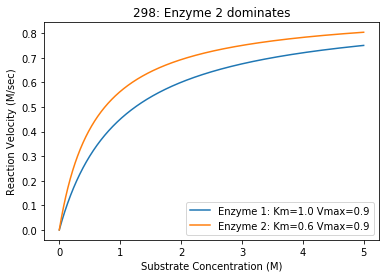

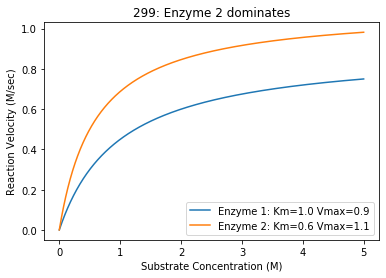

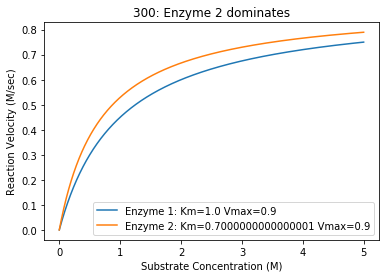

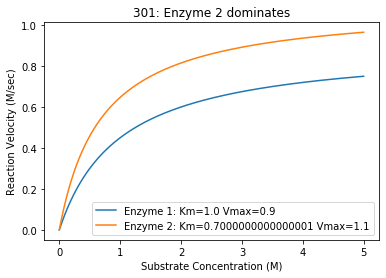

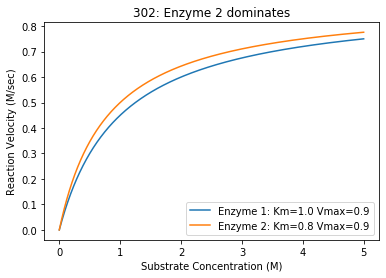

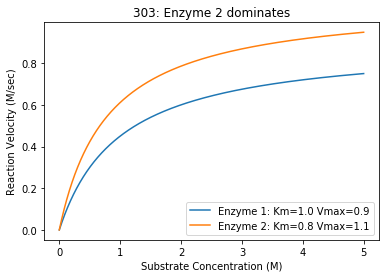

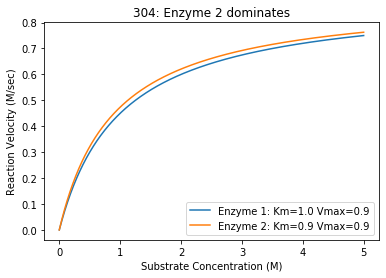

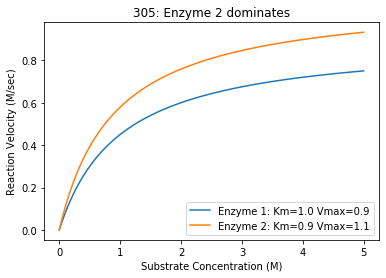

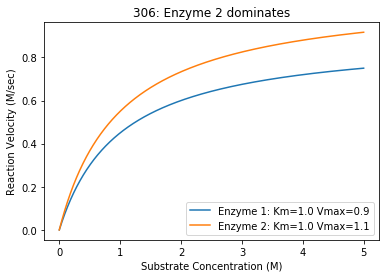

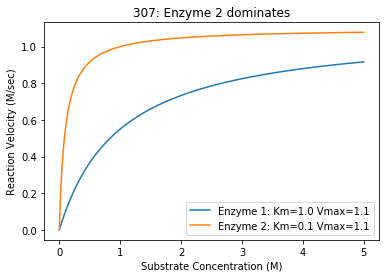

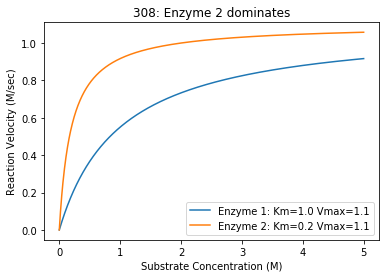

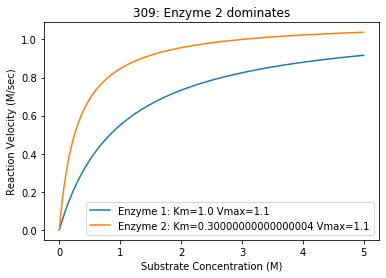

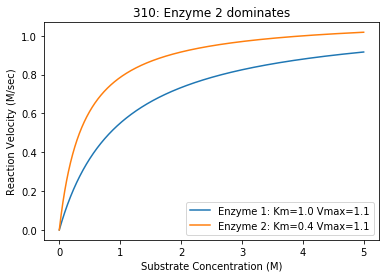

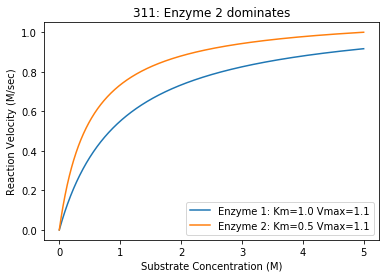

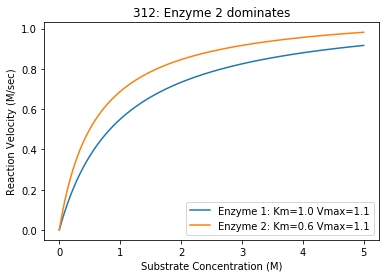

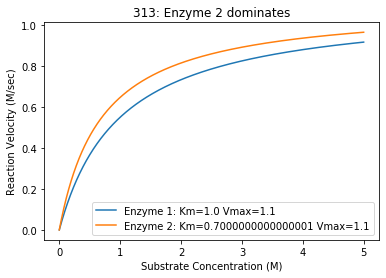

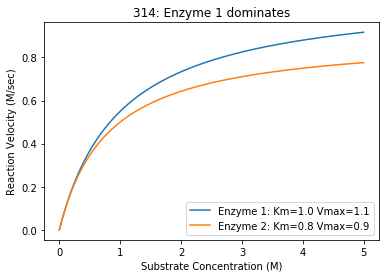

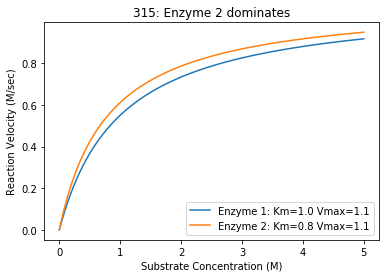

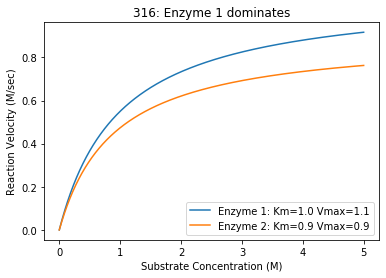

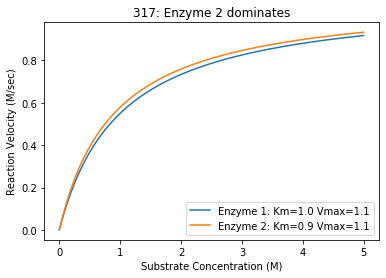

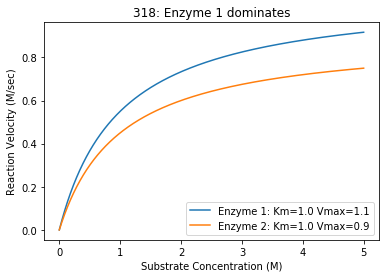

In [5]:
""" Plot Examples with No Intersection """

count = 0

for c1, c2 in rejects: 
    count += 1
    
    plt.plot(S, data[c1], label=f'Enzyme 1: Km={c1[0]} Vmax={c1[1]}')
    plt.plot(S, data[c2], label=f'Enzyme 2: Km={c2[0]} Vmax={c2[1]}')
    
    plt.xlabel('Substrate Concentration (M)')
    plt.ylabel('Reaction Velocity (M/sec)')
    plt.title(f'{count}: Enzyme {dominant(data[c1], data[c2])} dominates')
    plt.legend()
    
    plt.show()   

## PFK plots

PFK info - https://www.brenda-enzymes.org/enzyme.php?ecno=2.7.1.56#


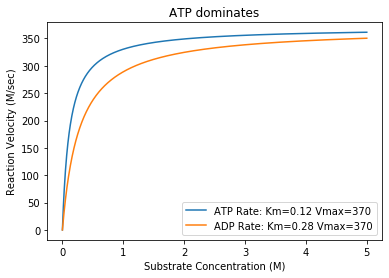

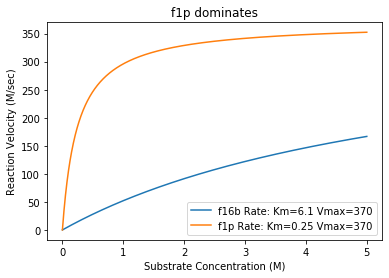

In [6]:
# These come from E. Coli
# PFK info - https://www.brenda-enzymes.org/enzyme.php?ecno=2.7.1.56#
PFK_kms = {'ATP': 0.12, 'ADP': 0.28, 'f16b': 6.1, 'f1p': 0.25}
PFK_pairs = [('ATP', 'ADP'), ('f16b', 'f1p')]

plot_with_data(S, PFK_kms, PFK_pairs)


## GUT Plots

GUT info - https://www.brenda-enzymes.org/enzyme.php?ecno=2.7.7.9#

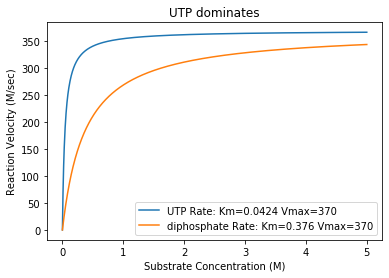

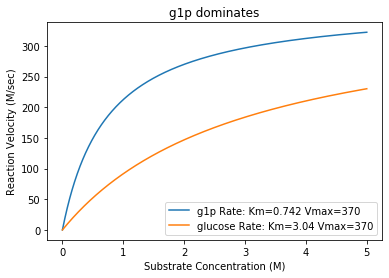

In [7]:
# These come from Nostoc sp.
# https://www.brenda-enzymes.org/enzyme.php?ecno=2.7.7.9&Suchword=&reference=&UniProtAcc=&organism%5B%5D=Nostoc+sp.#KM%20VALUE%20[mM]

GUT_kms = {'g1p': 0.742, 'glucose': 3.04, 'UTP': 0.0424, 'diphosphate': 0.376}
GUT_pairs = [('UTP', 'diphosphate'), ('g1p', 'glucose')]

plot_with_data(S, GUT_kms, GUT_pairs)

## PFK vs GUT Plot

PFK and GUT both act on similar sugars. Km should predict which one is the preferred pathway.

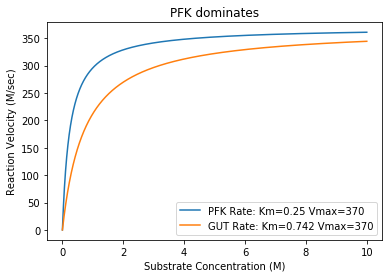

In [8]:
S = np.linspace(0, 10, 10000)

vs_kms = {'GUT': 0.742, 'PFK': 0.25}
vs_pairs = [('PFK', 'GUT')]

plot_with_data(S, vs_kms, vs_pairs)